<a href="https://colab.research.google.com/github/mermerm/r_statistics/blob/master/17multiregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다중회귀분석
단일 회귀분석에 비해 독립변수가 2개 이상 증가
기술통계학이나 추론통계학의 주요 기법

종속변수 y를 보다 더 잘 설명하고 예측하기 위해 여러 독립변수 x를 사용함

다중회귀방정식
$y = a + b x_1 + cx_2 + dx_3 + \cdots\ $

하지만, 독립변수가 3개 이상인 경우 그래프로 표현하기 어려워지므로 보통 $a+ bx_1 + cx_2 $ 정도로만 고려하는 것이 좋음

In [1]:
# 코랩에서 한글 출력하기
install.packages('showtext')
library(showtext)
font_add_google('Nanum Gothic', 'ng')
showtext_auto()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sysfonts’, ‘showtextdb’


Loading required package: sysfonts

Loading required package: showtextdb



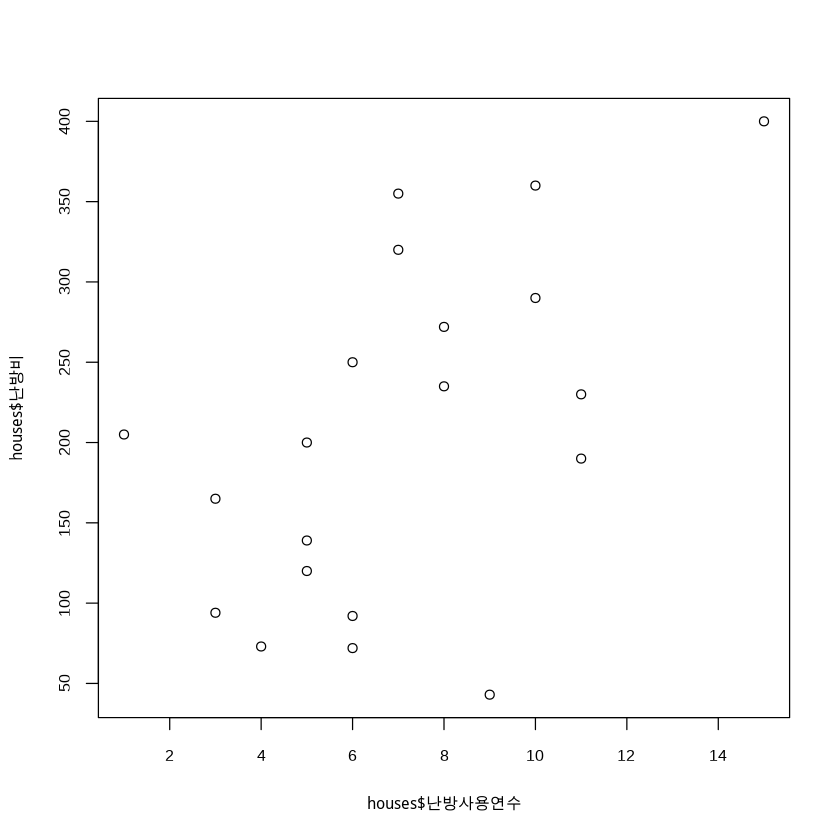

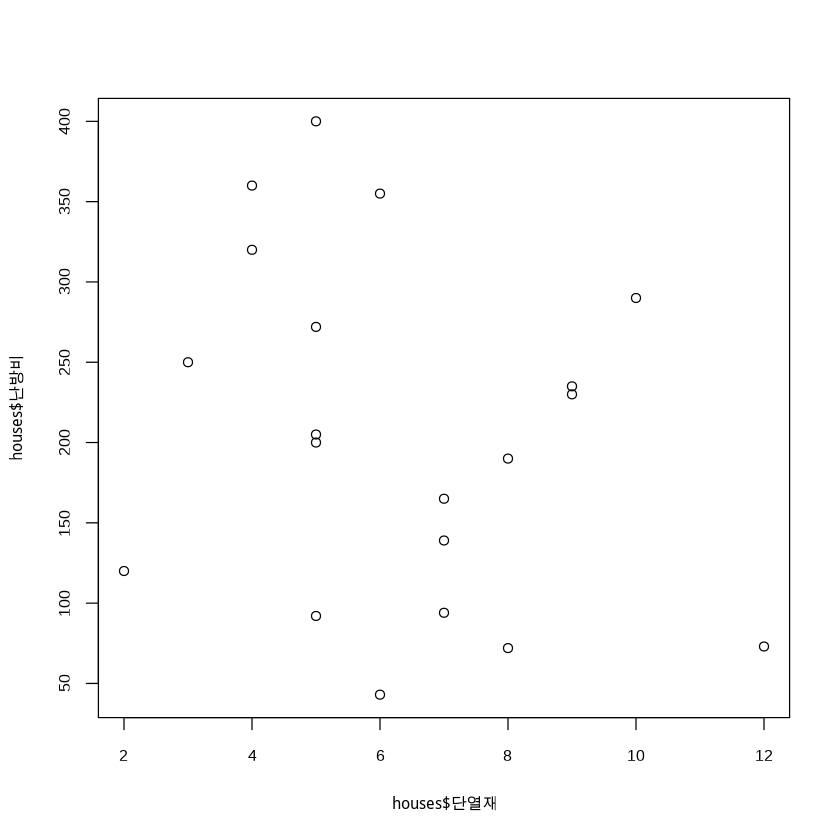

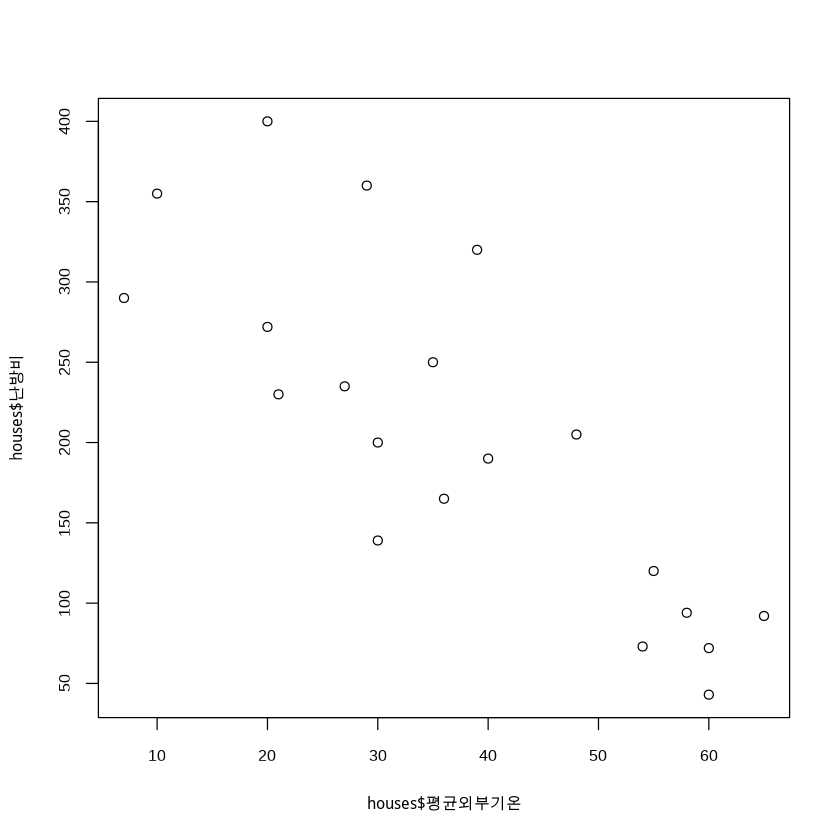

[1] 0.5367276

[1] -0.2571013

[1] -0.8115088

,난방비,평균외부기온,단열재,난방사용연수
난방비,1.0000000,-0.8115088,-0.2571013,0.5367276
평균외부기온,-0.8115088,1.0000000,-0.1030161,-0.4859877
단열재,-0.2571013,-0.1030161,1.0000000,0.0636174
난방사용연수,0.5367276,-0.4859877,0.0636174,1.0000000


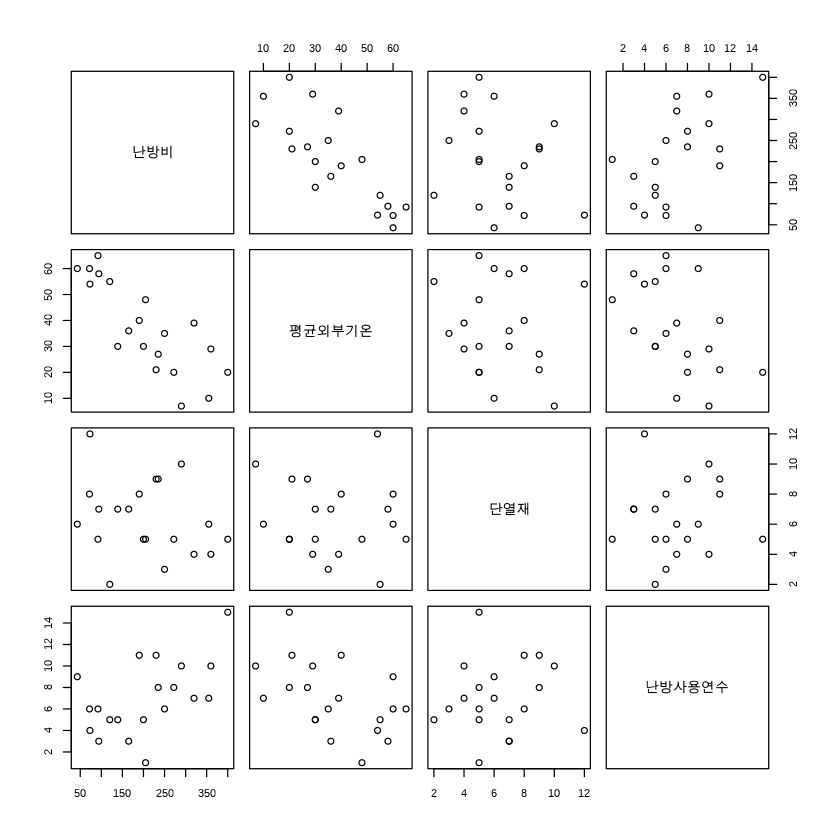

In [2]:
# 부동산 회사에서 소유하고 있는 주택의 난방비에 대한 회귀분석 요청(houses.txt)
houses <- read.csv('https://raw.githubusercontent.com/mermerm/r_statistics/master/datasets/houses.txt', sep='\t')

# 산점도
plot(houses$`난방사용연수`, houses$`난방비`)
plot(houses$`단열재`, houses$`난방비`)
plot(houses$`평균외부기온`, houses$`난방비`)

# 산점도 행렬
plot(houses)

# 상관계수 : cor
cor(houses$`난방사용연수`, houses$`난방비`)
cor(houses$`단열재`, houses$`난방비`)
cor(houses$`평균외부기온`, houses$`난방비`)

# 상관계수 행렬
cor(houses)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.84 loaded



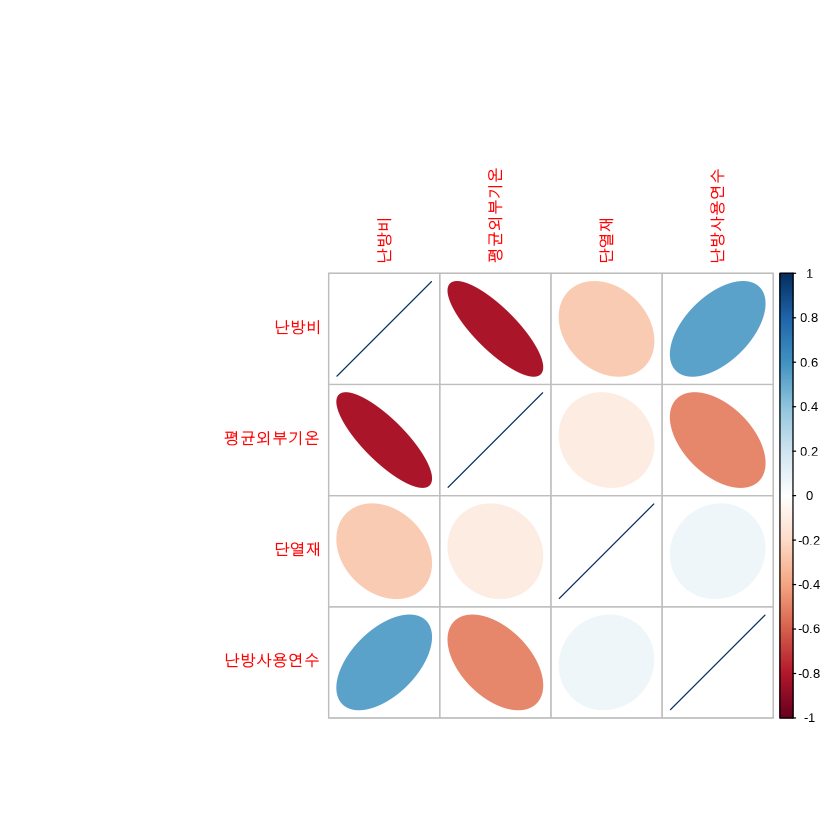

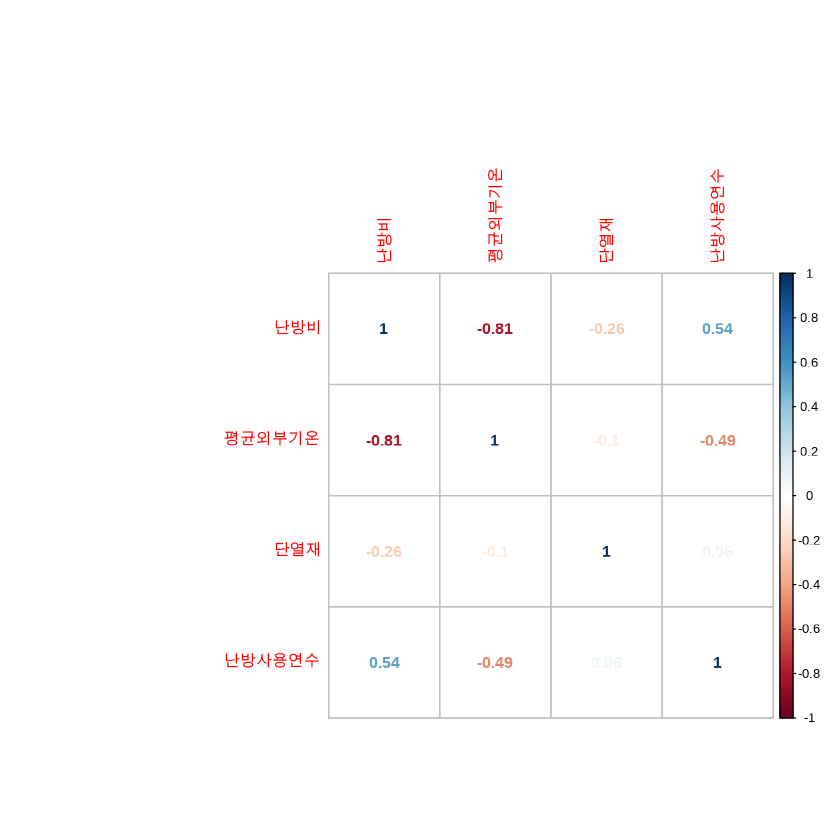

In [3]:
# 히트맵으로 상관계수 확인
install.packages('corrplot')
library(corrplot)

cp <- cor(houses)
corrplot(cp, method='ellipse')
corrplot(cp, method='number')

In [4]:
# 단일회귀분석
# lm(종속변수~독립변수)

# 다중회귀분석
# lm(종속변수~독립변수1+독립변수2+독립변수3+... )
# lm(종속변수~.)

In [5]:
# 난방비에 대한 다중회귀분석
lm <- lm(houses$`난방비`~houses$`난방사용연수`+houses$`단열재`+houses$`평균외부기온`)
lm


Call:
lm(formula = houses$난방비 ~ houses$난방사용연수 + houses$단열재 + 
    houses$평균외부기온)

Coefficients:
        (Intercept)  houses$난방사용연수        houses$단열재  
            427.194                6.101              -14.831  
houses$평균외부기온  
             -4.583  


다중회귀문석 결과를 회귀식으로 표현

$ y = 427.2 + 6.1x_1 -14.831x_2 -4.6x_3$

회귀식 해석하기
난방기연수가 1년씩 증가하면 : 난방비가 6.1만큼 증가, 
단열재 두께가 1cm씩 증가하면 : 난방비가 -14.831만큼 감소
외부기온이 1도씩 증가하면 : 난방비가 4.6만큼 감소
주택 자체의 기본 난방비 : 427.2만큼 소비


In [6]:
# summary(lm)
# 결정계수 : 0.08 > 각 독립변수로 종속의 변화를 설명할 수 있음
# 회귀모형의 유의성 검정 : p-value가 0.05보다 작음 >> 회귀모형의 회귀계수들의 값이 0이 아님
# 각 회귀계수의 유의성검정 : p-vaule가 0.05보다 작음 >> 각 회귀계수의 값이 0이 아님
# 최종적으로 난방비 산출시 단열재, 평균외부기온이 많은 영향을 미침

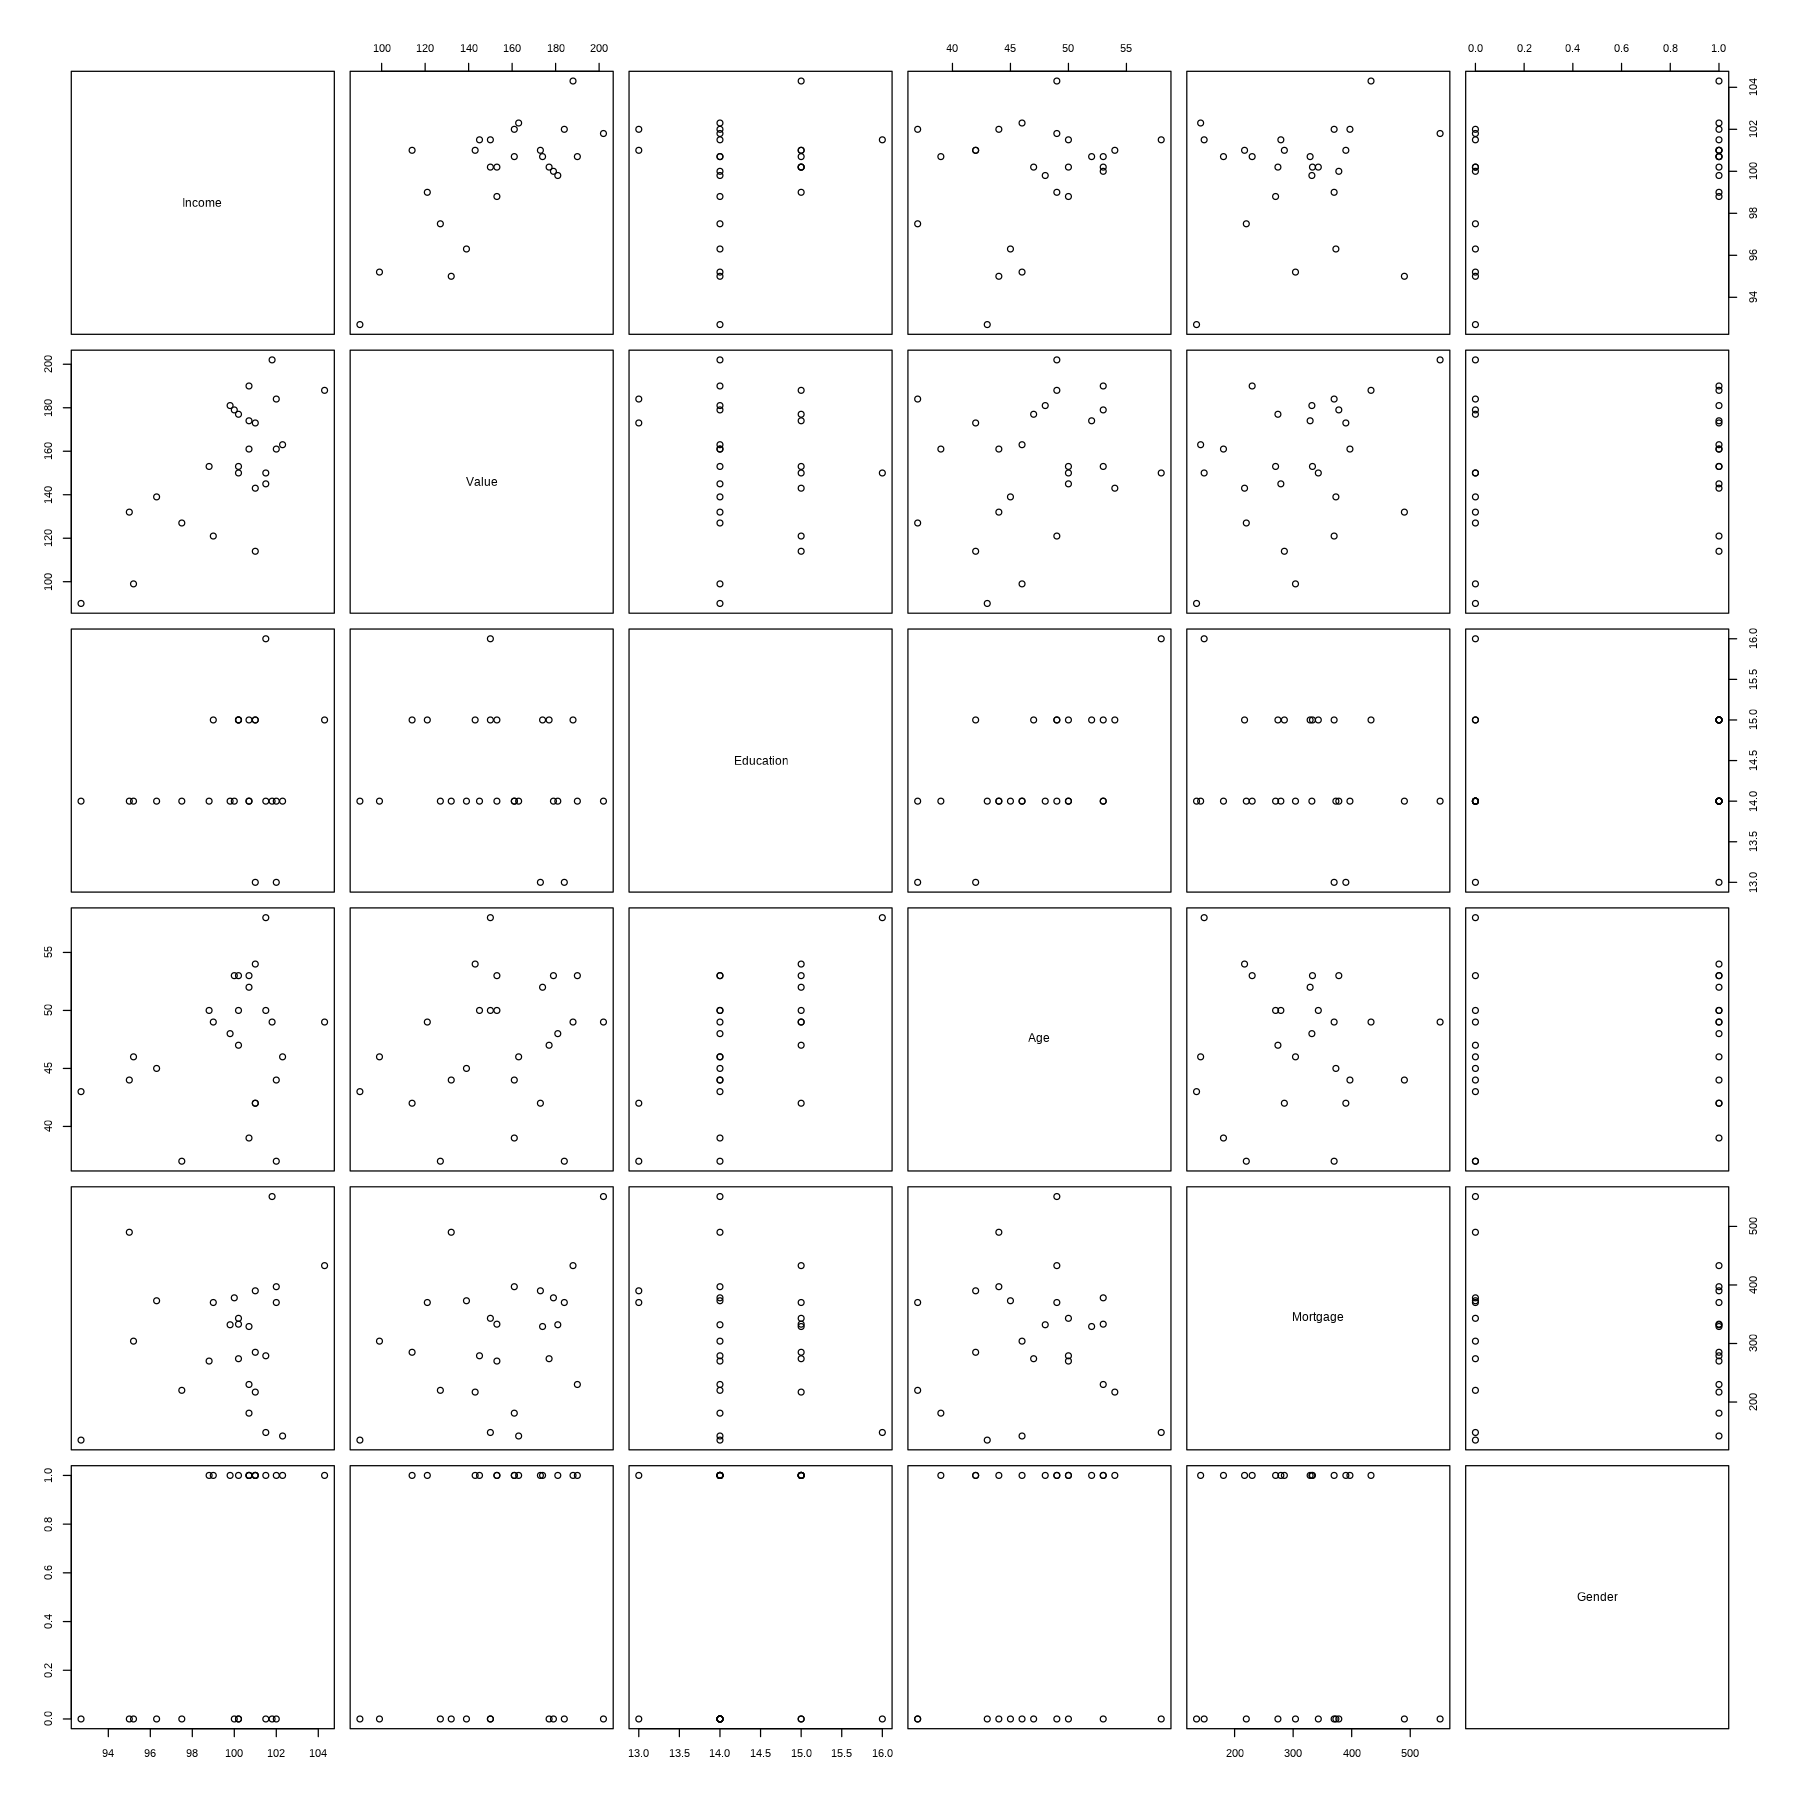

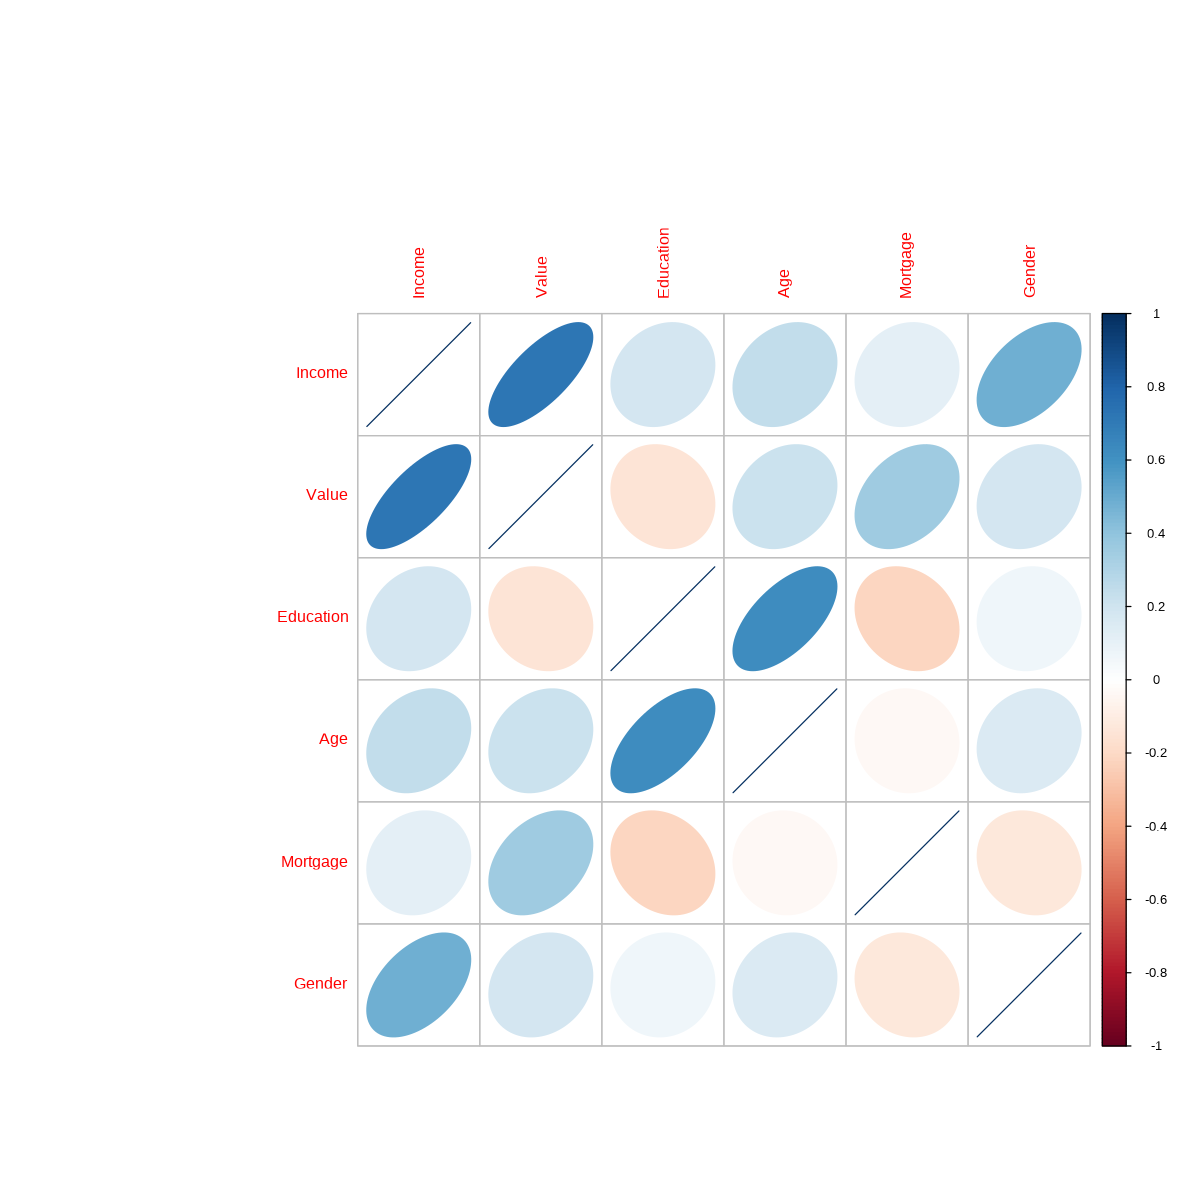


Call:
lm(formula = bank$Income ~ bank$Mortgage + bank$Education + bank$Age + 
    bank$Value + bank$Gender)

Coefficients:
   (Intercept)   bank$Mortgage  bank$Education        bank$Age      bank$Value  
    70.6483026      -0.0009212       1.6159743      -0.1221059       0.0718329  
   bank$Gender  
     1.8167604  



Call:
lm(formula = bank$Income ~ bank$Mortgage + bank$Education + bank$Age + 
    bank$Value + bank$Gender)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1236 -1.1184  0.4728  0.9584  2.3578 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    70.6483026  7.5013154   9.418 1.37e-08 ***
bank$Mortgage  -0.0009212  0.0031880  -0.289  0.77575    
bank$Education  1.6159743  0.6060901   2.666  0.01526 *  
bank$Age       -0.1221059  0.0785276  -1.555  0.13646    
bank$Value      0.0718329  0.0124864   5.753 1.52e-05 ***
bank$Gender     1.8167604  0.6259073   2.903  0.00913 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.485 on 19 degrees of freedom
Multiple R-squared:  0.7491,	Adjusted R-squared:  0.6831 
F-statistic: 11.34 on 5 and 19 DF,  p-value: 3.556e-05


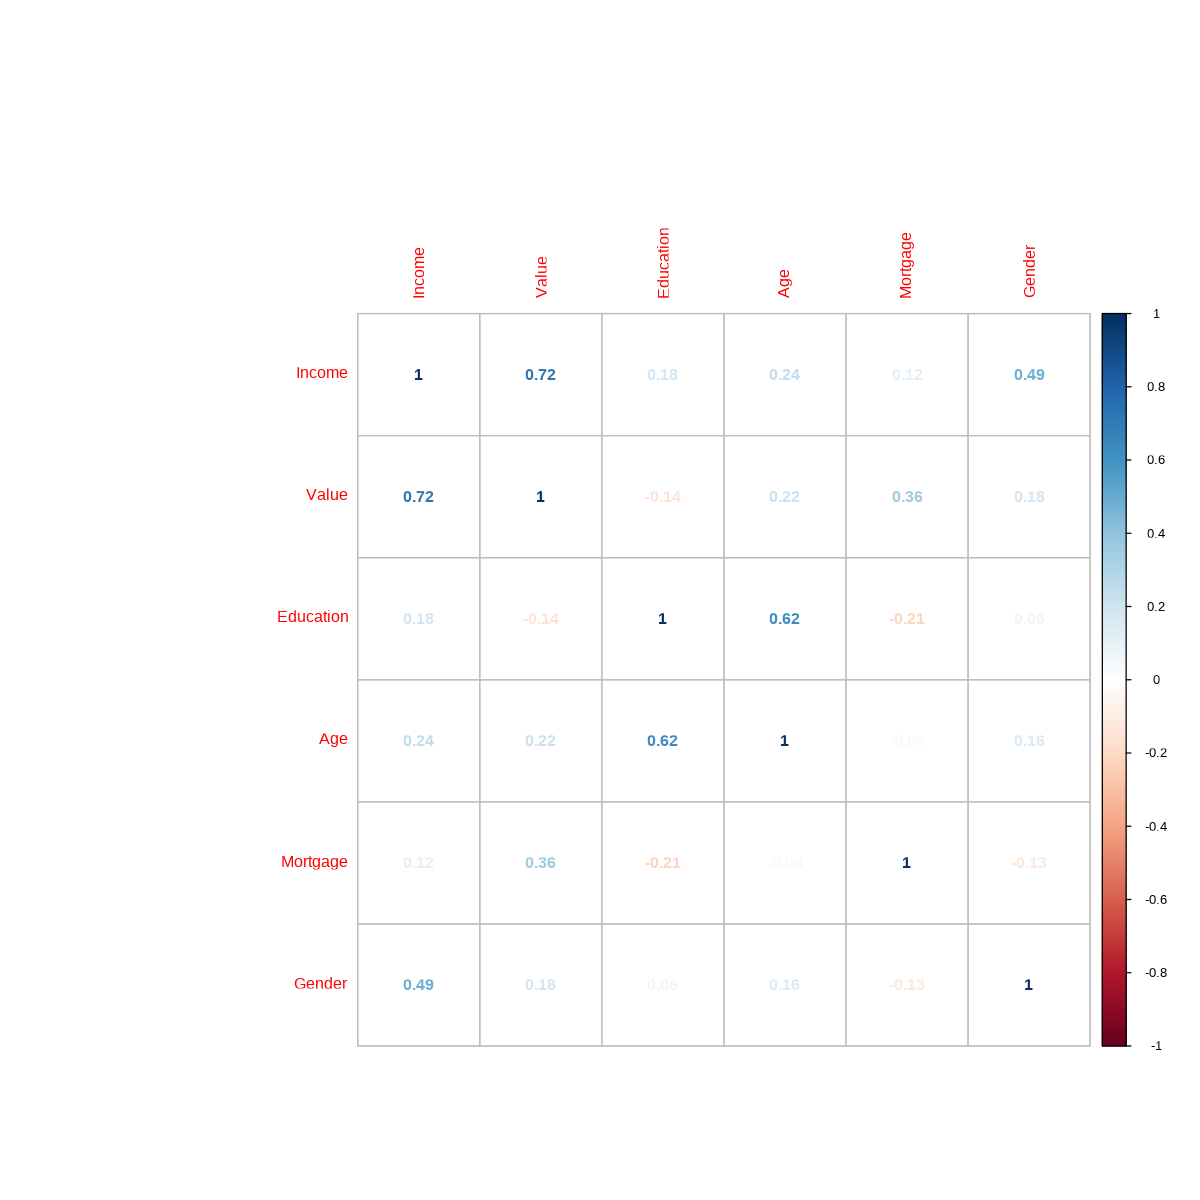

In [7]:
# 어떤 은행에서 담보주택 분석을 위해 주택가격, 세대주 교육수준, 세대주 연령, 월 상환액, 세대주 성별등이 가계소득 수준과 어떤 관련이 있는지 다중회귀분석을 실시하세요.
# bank.txt.
bank <- read.csv('https://raw.githubusercontent.com/mermerm/r_statistics/master/datasets/banks.txt', sep='\t')
options(repr.plot.width=15, repr.plot.height=15)
plot(bank)

options(repr.plot.width=10, repr.plot.height=10)
cor <- cor(bank)
corrplot(cor, method='ellips')
corrplot(cor, method='number')

lmbank <- lm(bank$Income~bank$Mortgage+bank$Education+bank$Age+bank$Value+bank$Gender)
# m <- lm(Income~., data=bank)
lmbank
summary(lmbank)

# 결정력 : 68%
# 회귀모형의 유의성 : 0.05보다 작음
# 회귀계수의 유의성 : Value, Gender, Education 순으로 유의함
# y = 70.64 + 0.07v + 1.8g +1.6e


# 다중회귀분석 적합성 평가
이러한 회귀모형이 과연 적합한 것인지 의문! 

==> 회귀모형 작성 시 적절한 필요조건을 만족하는지 알아봄

==> 회귀모형 적합성 그래프 작성 : qq plot
 

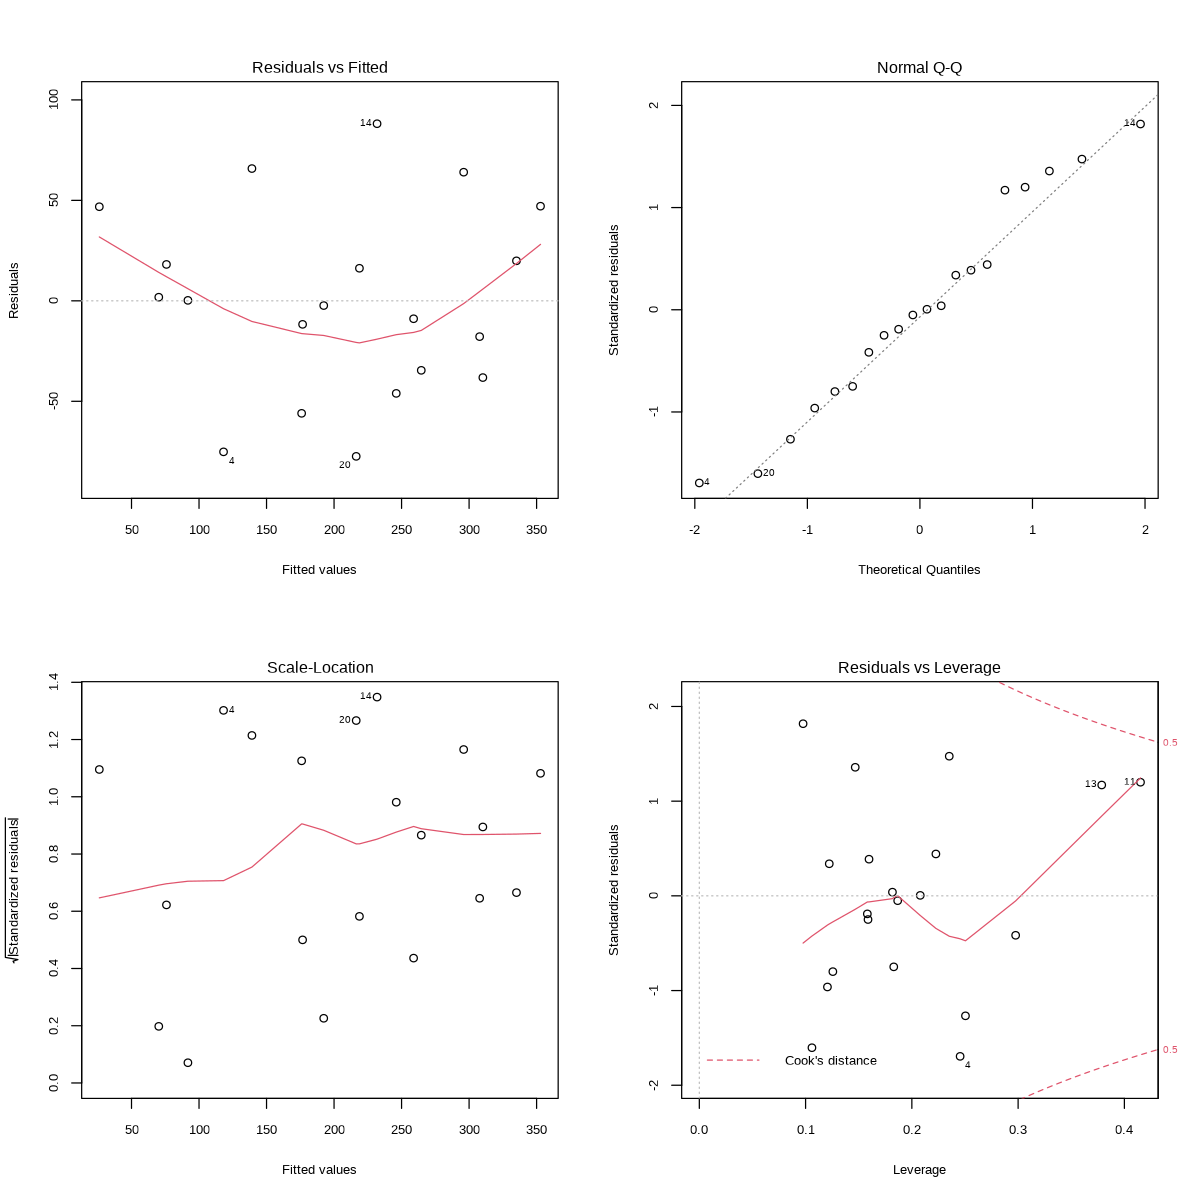

In [8]:
# 난방비 다중회귀모형에 대한 적합성 평가

# 2x2 그래프를 그리기 위해 설정 초기화
.opar <- par(no.readonly=T)
par(mfrow=c(2,2))

plot(lm)
# (시계방향으로) 선형성, 정규성, 분산성, 독립성 순으로 그래프 출력

==> 난방비 회귀모형의 적합성 분석 결과
난방사용연수 변수를 제외하고 나머지 계수들은 유의했지만, 몇몇 이상치 때문에 선형관계, 정규성, 독립성에 문제가 있는것으로 보임

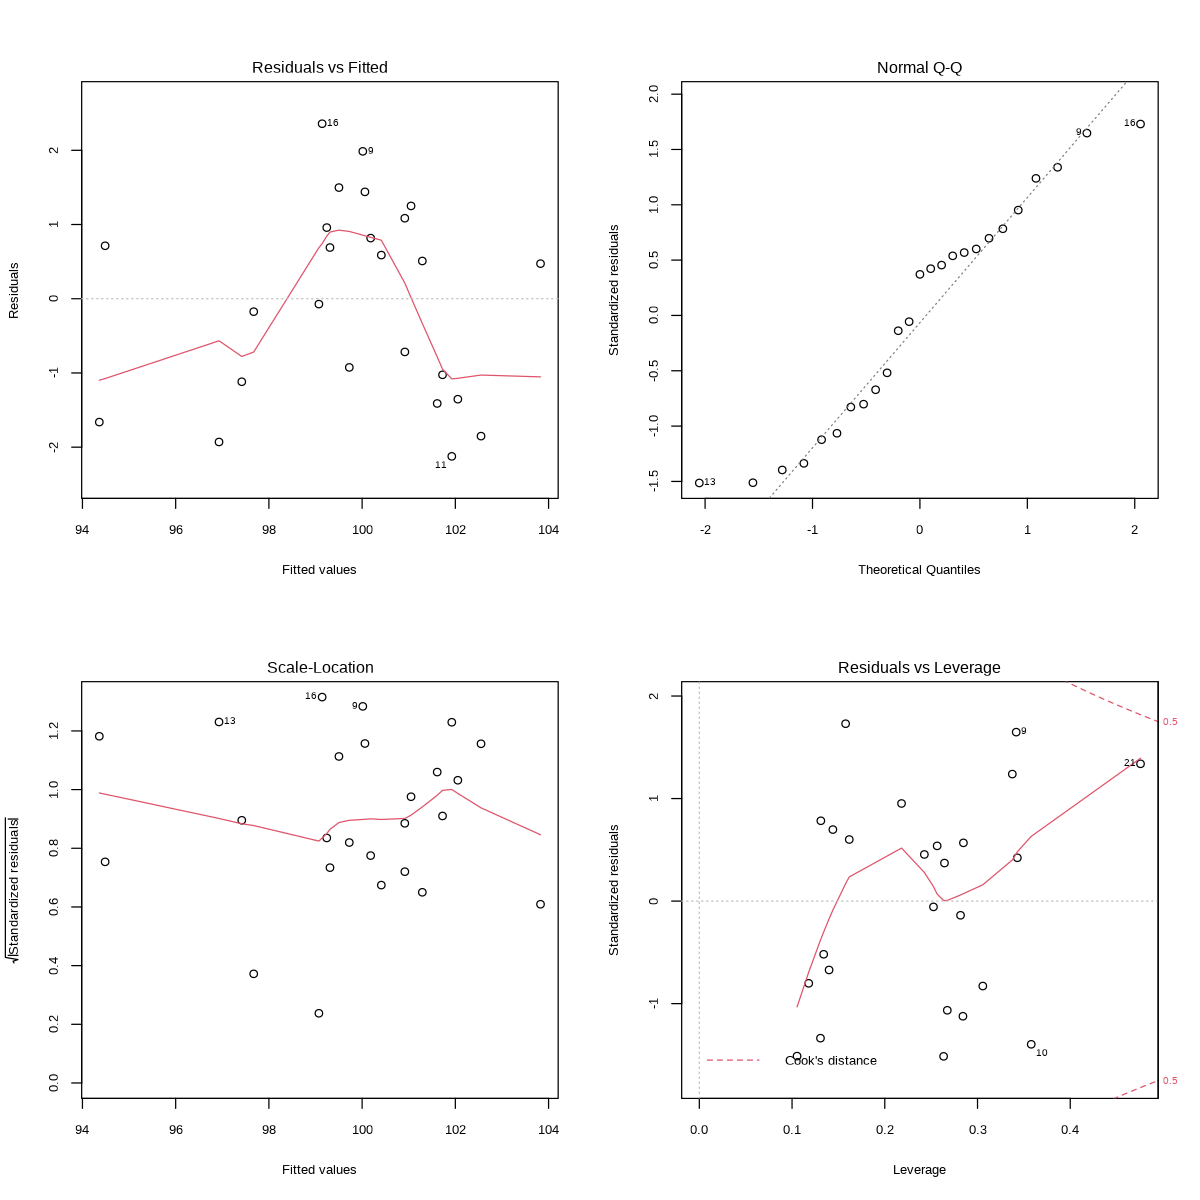

In [9]:
# 담보주택 분석 회귀모형에 대한 적합성 평가를 실시하세요.
par(mfrow=c(2,2))
plot(lmbank)

# 담보주택 분석 회귀모형의 적합성 분석 결과
# Value, gender, education 등의 계수들은 유의하지만 몇몇 이상치 때문에 선형관계, 정규성, 분산성, 독립성에 문제가 있는 것으로 보임

## 다중공선성
* 회귀분석시 종속변수와 독립변수간의 상관여부를 판단했었는데, 간혹 독립변수들끼리 서로 상관되는 경우가 발생
* 서로 비슷한 성격을 가지는 독립변수들이 존재하는 경우 주로 발생 => 다중공선성의 문제

* 두 독립변수간의 상관계수가 -0.7~0.7사이면 사용해도 좋음
* 다중공선성 여부를 파악하려면 팽창계수를 알아봐야 함
* 팽창계수가 10이상이면 해당 독립변수는 제외시킴
* R에서는 vif함수를 이용해서 팽창계수를 알아봄

,y,x1,x2,x3,x4
y,1.0000000,0.7307175,0.8162526,-0.5346707,-0.8213050
x1,0.7307175,1.0000000,0.2285795,-0.8241338,-0.2454451
x2,0.8162526,0.2285795,1.0000000,-0.1392424,-0.9729550
x3,-0.5346707,-0.8241338,-0.1392424,1.0000000,0.0295370
x4,-0.8213050,-0.2454451,-0.9729550,0.0295370,1.0000000


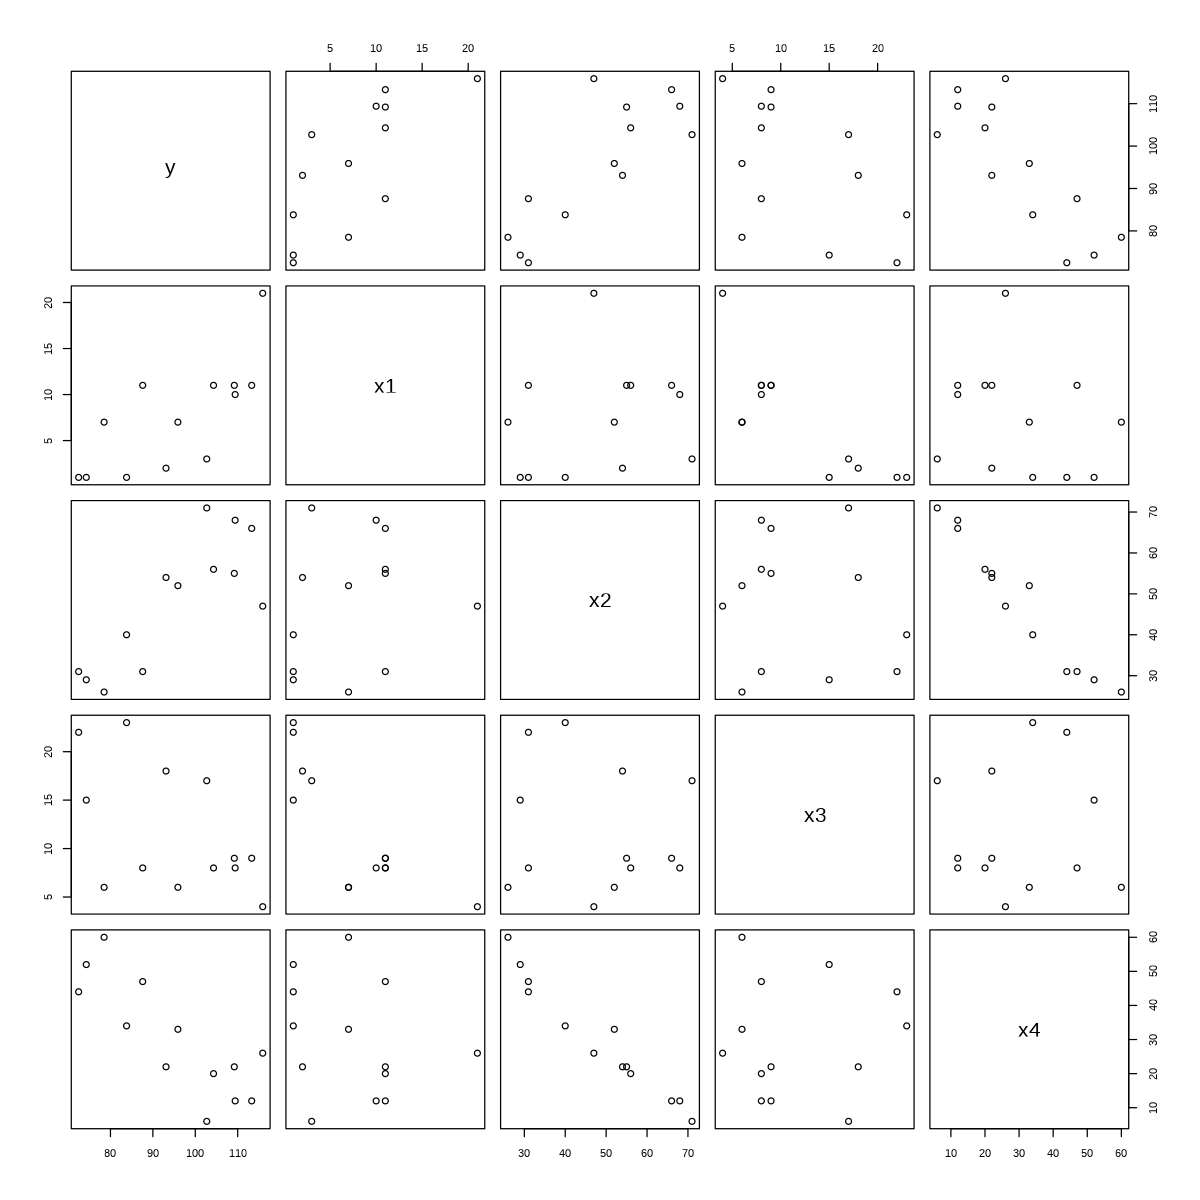


Call:
lm(formula = y ~ ., data = cement)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1750 -1.6709  0.2508  1.3783  3.9254 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  62.4054    70.0710   0.891   0.3991  
x1            1.5511     0.7448   2.083   0.0708 .
x2            0.5102     0.7238   0.705   0.5009  
x3            0.1019     0.7547   0.135   0.8959  
x4           -0.1441     0.7091  -0.203   0.8441  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.446 on 8 degrees of freedom
Multiple R-squared:  0.9824,	Adjusted R-squared:  0.9736 
F-statistic: 111.5 on 4 and 8 DF,  p-value: 4.756e-07


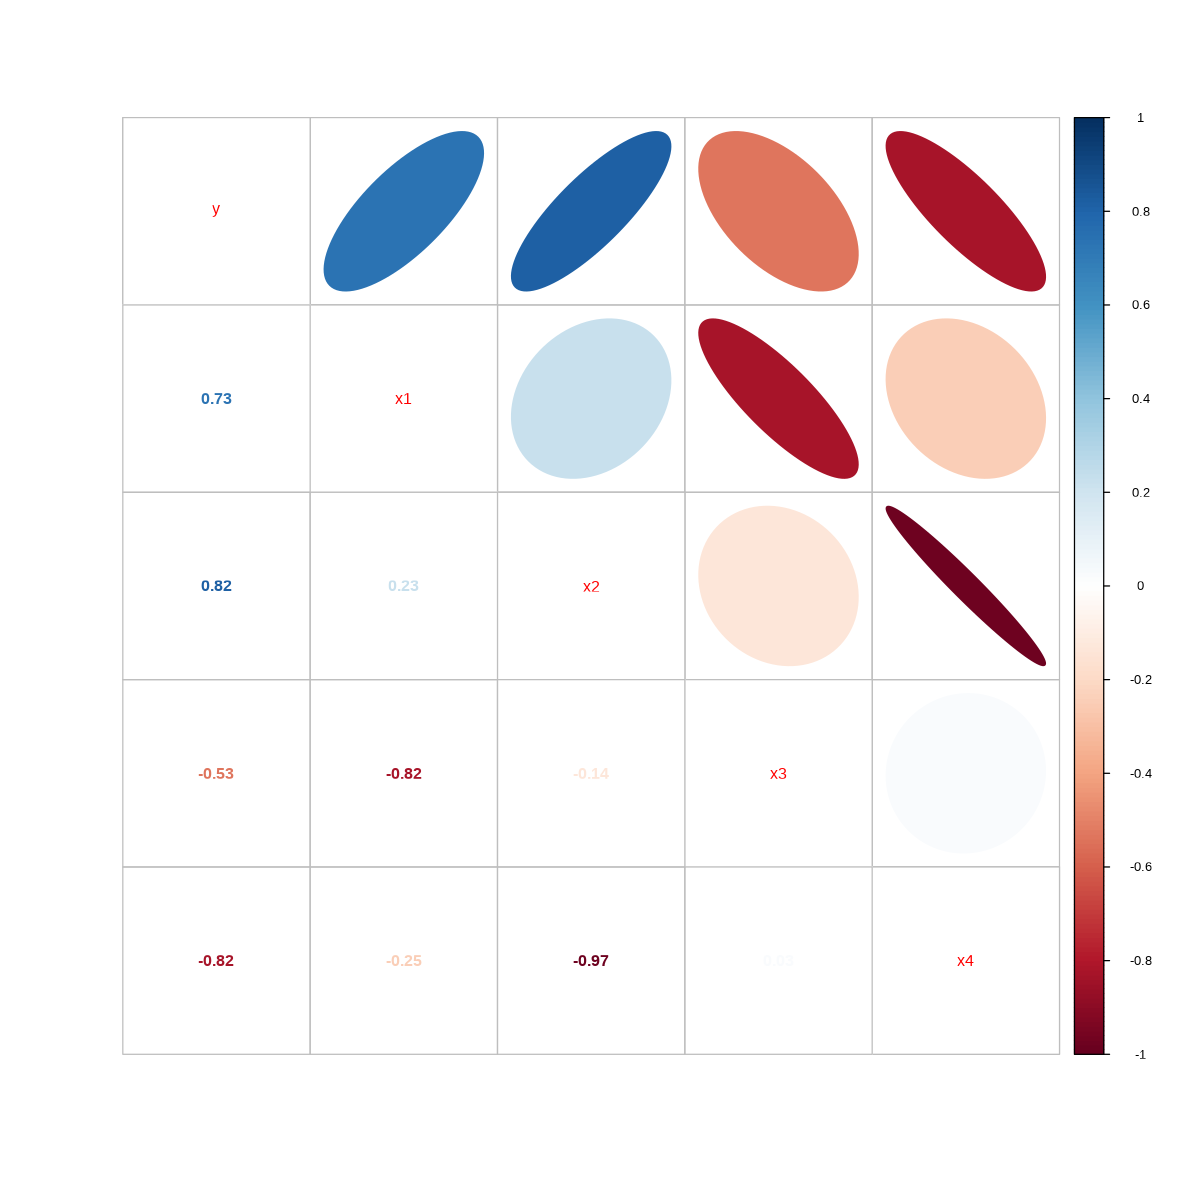

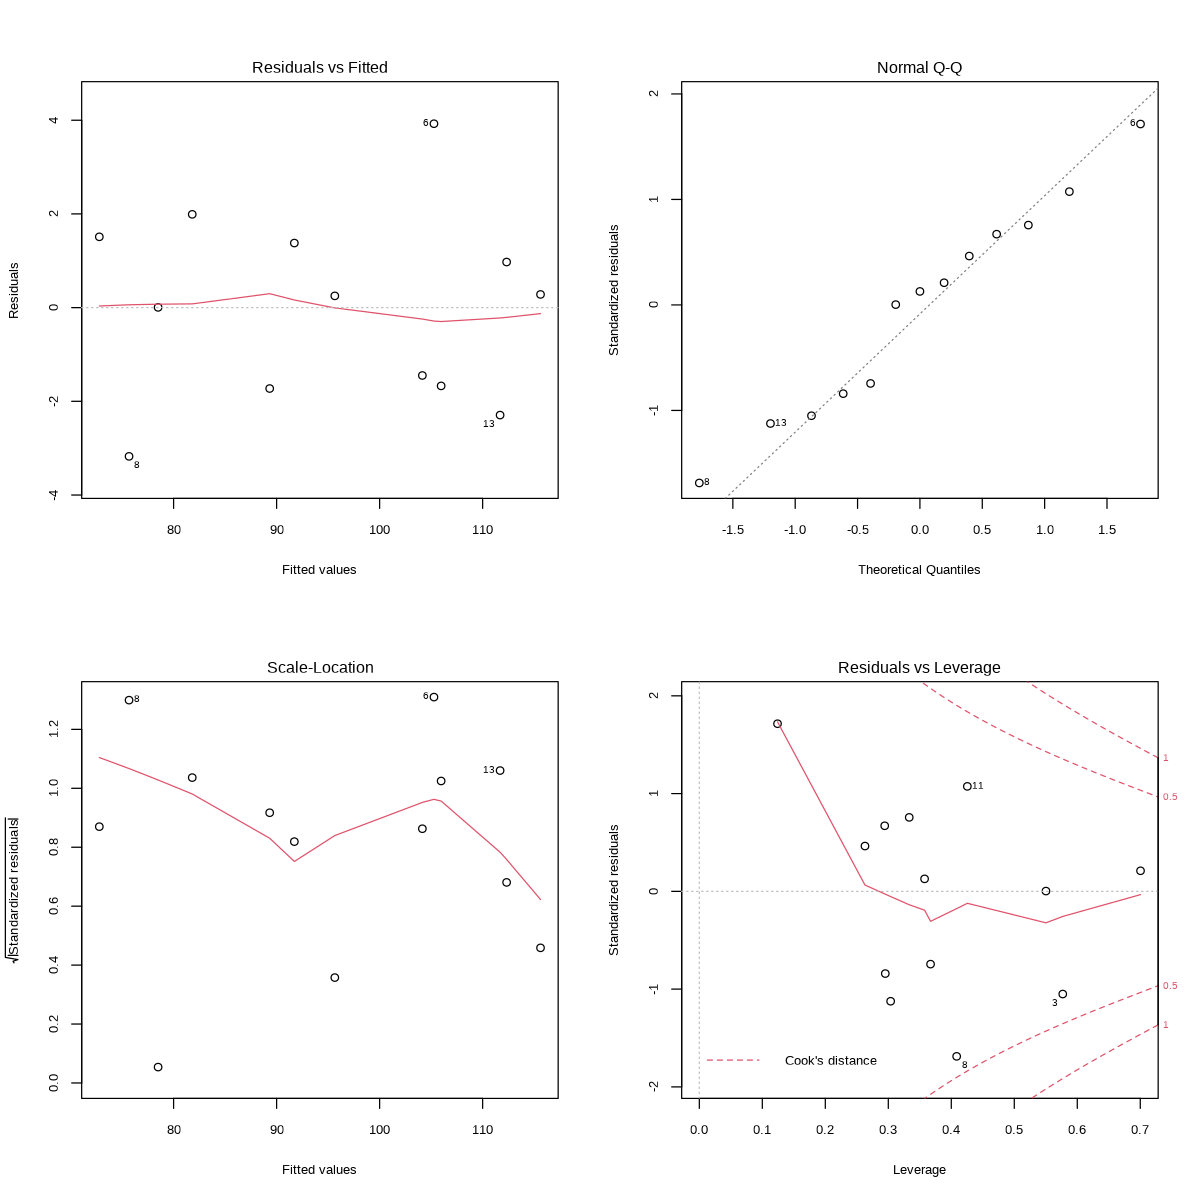

In [10]:
# 시멘트가 굳어지며 발생하는 열의 양에 영향을 미치는 4가지 성분에 대한 회귀분석 실시(cement.txt)

x1 <- c(7, 1, 11, 11, 7, 11, 3, 1, 2, 21, 1, 11, 10)
x2 <- c(26, 29, 56, 31, 52, 55, 71, 31, 54, 47, 40, 66, 68)
x3 <- c(6, 15, 8, 8, 6, 9, 17, 22, 18, 4, 23, 9, 8)
x4 <- c(60, 52, 20, 47, 33, 22, 6, 44, 22, 26, 34, 12, 12)
y <- c(78.5, 74.3, 104.3, 87.6, 95.9, 109.2, 102.7, 
        72.5, 93.1, 115.9, 83.8, 113.3, 109.4)

cement <- data.frame(y, x1, x2, x3, x4)
plot(cement)
cor(cement)
corrplot.mixed(cor(cement), upper='ellipse', lower='number')  # 그래프를 합쳐서 한번에 그림

lmcement <- lm(y~., data=cement)
summary(lmcement)  # 종속-독립의 관계보다 독립-독립의 관계가 더 커서 종속-독립의 관계를 상쇄시킴  >> *이 없다
par(mfrow=c(2,2))
plot(lmcement)

#### 회귀모형 분석 
* 결정계수 : 0.9736
* 회귀모형 유의성 : 0.05보다 작음
* 회귀계수 유의성 : 0.05보다 큼

 => 결정계수는 높지만, 회귀계수의 유의성은 없음

 => 다중공선성 때문에 발생


In [11]:
install.packages('car')
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘data.table’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’


Loading required package: carData



In [12]:
# x1, x3은 x2, x4에 비해 팽창계수가 작으므로 x2, x4를 제외하고 다시 회귀모형을 생성

# 재생성한 회귀모형 분석 1
lm2<- lm(y~x1+x3, data=cement)
summary(lm2)

# 재생성한 회귀모형 분석 2
lm3 <- lm(y~x2+x4, data=cement)
summary(lm3)

# 재생성한 회귀모형 분석 3
lm4 <- lm(y~x1+x2, data=cement)
summary(lm4)

# 재생성한 회귀모형 분석 4
lm5 <- lm(y~x3+x4, data=cement)
summary(lm5)


Call:
lm(formula = y ~ x1 + x3, data = cement)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.142  -7.779   2.558   7.226  15.008 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  72.3490    17.0528   4.243  0.00171 **
x1            2.3125     0.9598   2.409  0.03672 * 
x3            0.4945     0.8814   0.561  0.58717   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.08 on 10 degrees of freedom
Multiple R-squared:  0.5482,	Adjusted R-squared:  0.4578 
F-statistic: 6.066 on 2 and 10 DF,  p-value: 0.01883



Call:
lm(formula = y ~ x2 + x4, data = cement)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.193  -7.260   0.652   4.104  19.008 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  94.1601    56.6271   1.663    0.127
x2            0.3109     0.7486   0.415    0.687
x4           -0.4569     0.6960  -0.657    0.526

Residual standard error: 9.321 on 10 degrees of freedom
Multiple R-squared:  0.6801,	Adjusted R-squared:  0.6161 
F-statistic: 10.63 on 2 and 10 DF,  p-value: 0.003352



Call:
lm(formula = y ~ x1 + x2, data = cement)

Residuals:
   Min     1Q Median     3Q    Max 
-2.893 -1.574 -1.302  1.363  4.048 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 52.57735    2.28617   23.00 5.46e-10 ***
x1           1.46831    0.12130   12.11 2.69e-07 ***
x2           0.66225    0.04585   14.44 5.03e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.406 on 10 degrees of freedom
Multiple R-squared:  0.9787,	Adjusted R-squared:  0.9744 
F-statistic: 229.5 on 2 and 10 DF,  p-value: 4.407e-09



Call:
lm(formula = y ~ x3 + x4, data = cement)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2715 -2.8916 -0.6439  1.5115  8.2566 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 131.28241    3.27477  40.089 2.23e-12 ***
x3           -1.19985    0.18902  -6.348 8.38e-05 ***
x4           -0.72460    0.07233 -10.018 1.56e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.192 on 10 degrees of freedom
Multiple R-squared:  0.9353,	Adjusted R-squared:  0.9223 
F-statistic: 72.27 on 2 and 10 DF,  p-value: 1.135e-06


# 결론
다중공선성을 최소로 하는 변수들만 선택해서 분석하는 것이 회귀모형의 유의성을 보장하는데 도움이 됨

# 독립변수 최적화
독립변수가 많을 때 유의한 계수는 포함시키고 유의하지 않은 변수는 제외시켜 작성한 회귀방정식은 간단해지고 이해하기도 쉬워짐

다중회귀식에 포함할 수 있는 독립변수들을 효과적으로 선별할 수 있는 분석방법

=> 단계적 회귀법, 단계적 변수 선택법

=> 전진소거법, 후진소거법, 최적소거법

* 전진소거법 : 중요도가 높은 변수를 하나식 추가해가며 회귀식 작성
* 후진소거법 : 중요도가 낮은 변수를 하나씩 제거해가며 회귀식 작성
* 최적소거법 : 전진/후진 소거법을 적절히 조합해서 회귀식 작성

소거법을 이용해서 만들어진 회귀모형에 대한 성능평가는 AIC를 이용함

AIC : akaike information criterion

AIC 값이 작을수록 적절한 모혐임을 의미함

R에서는 step함수를 이용해서 소거법을 적용할 수 있음

step(회귀모델, 변수범위, 소거종류)

In [15]:
# 난방비 회귀모형을 위해 단계적 회귀법을 이용해서 적절한 회귀방정식을 작성하세요.

# 전진소거법
step(lm(난방비~1, data=houses), scope=list(lower=~1, upper=~평균외부기온+단열재+난방사용연수), direction='forward')
# => 난방비 ~ 평균외부기온+단열재(AIC=161.55)
# => 난방비 ~ 평균외부기온+단열재+난방사용연수(AIC=160.85)

Start:  AIC=187.46
난방비 ~ 1

               Df Sum of Sq    RSS    AIC
+ 평균외부기온  1    140215  72701 167.97
+ 난방사용연수  1     61336 151580 182.66
<none>                      212916 187.46
+ 단열재        1     14074 198842 188.09

Step:  AIC=167.97
난방비 ~ 평균외부기온

               Df Sum of Sq   RSS    AIC
+ 단열재        1   24979.6 47721 161.55
<none>                      72701 167.97
+ 난방사용연수  1    5648.1 67053 168.35

Step:  AIC=161.55
난방비 ~ 평균외부기온 + 단열재

               Df Sum of Sq   RSS    AIC
+ 난방사용연수  1      6026 41695 160.85
<none>                      47721 161.55

Step:  AIC=160.85
난방비 ~ 평균외부기온 + 단열재 + 난방사용연수




Call:
lm(formula = 난방비 ~ 평균외부기온 + 단열재 + 난방사용연수, 
    data = houses)

Coefficients:
 (Intercept)  평균외부기온        단열재  난방사용연수  
     427.194        -4.583       -14.831         6.101  


In [17]:
# 후진소거법
step(lm(난방비~., data=houses), direction='backward')

Start:  AIC=160.85
난방비 ~ 평균외부기온 + 단열재 + 난방사용연수

               Df Sum of Sq    RSS    AIC
<none>                       41695 160.85
- 난방사용연수  1      6026  47721 161.55
- 단열재        1     25357  67053 168.35
- 평균외부기온  1     91751 133446 182.11



Call:
lm(formula = 난방비 ~ 평균외부기온 + 단열재 + 난방사용연수, 
    data = houses)

Coefficients:
 (Intercept)  평균외부기온        단열재  난방사용연수  
     427.194        -4.583       -14.831         6.101  


In [19]:
# 최적소거법
step(lm(난방비~1, data=houses), scope=list(upper=~평균외부기온+단열재+난방사용연수), direction='both')

Start:  AIC=187.46
난방비 ~ 1

               Df Sum of Sq    RSS    AIC
+ 평균외부기온  1    140215  72701 167.97
+ 난방사용연수  1     61336 151580 182.66
<none>                      212916 187.46
+ 단열재        1     14074 198842 188.09

Step:  AIC=167.97
난방비 ~ 평균외부기온

               Df Sum of Sq    RSS    AIC
+ 단열재        1     24980  47721 161.55
<none>                       72701 167.97
+ 난방사용연수  1      5648  67053 168.35
- 평균외부기온  1    140215 212916 187.46

Step:  AIC=161.55
난방비 ~ 평균외부기온 + 단열재

               Df Sum of Sq    RSS    AIC
+ 난방사용연수  1      6026  41695 160.85
<none>                       47721 161.55
- 단열재        1     24980  72701 167.97
- 평균외부기온  1    151121 198842 188.09

Step:  AIC=160.85
난방비 ~ 평균외부기온 + 단열재 + 난방사용연수

               Df Sum of Sq    RSS    AIC
<none>                       41695 160.85
- 난방사용연수  1      6026  47721 161.55
- 단열재        1     25357  67053 168.35
- 평균외부기온  1     91751 133446 182.11



Call:
lm(formula = 난방비 ~ 평균외부기온 + 단열재 + 난방사용연수, 
    data = houses)

Coefficients:
 (Intercept)  평균외부기온        단열재  난방사용연수  
     427.194        -4.583       -14.831         6.101  


'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


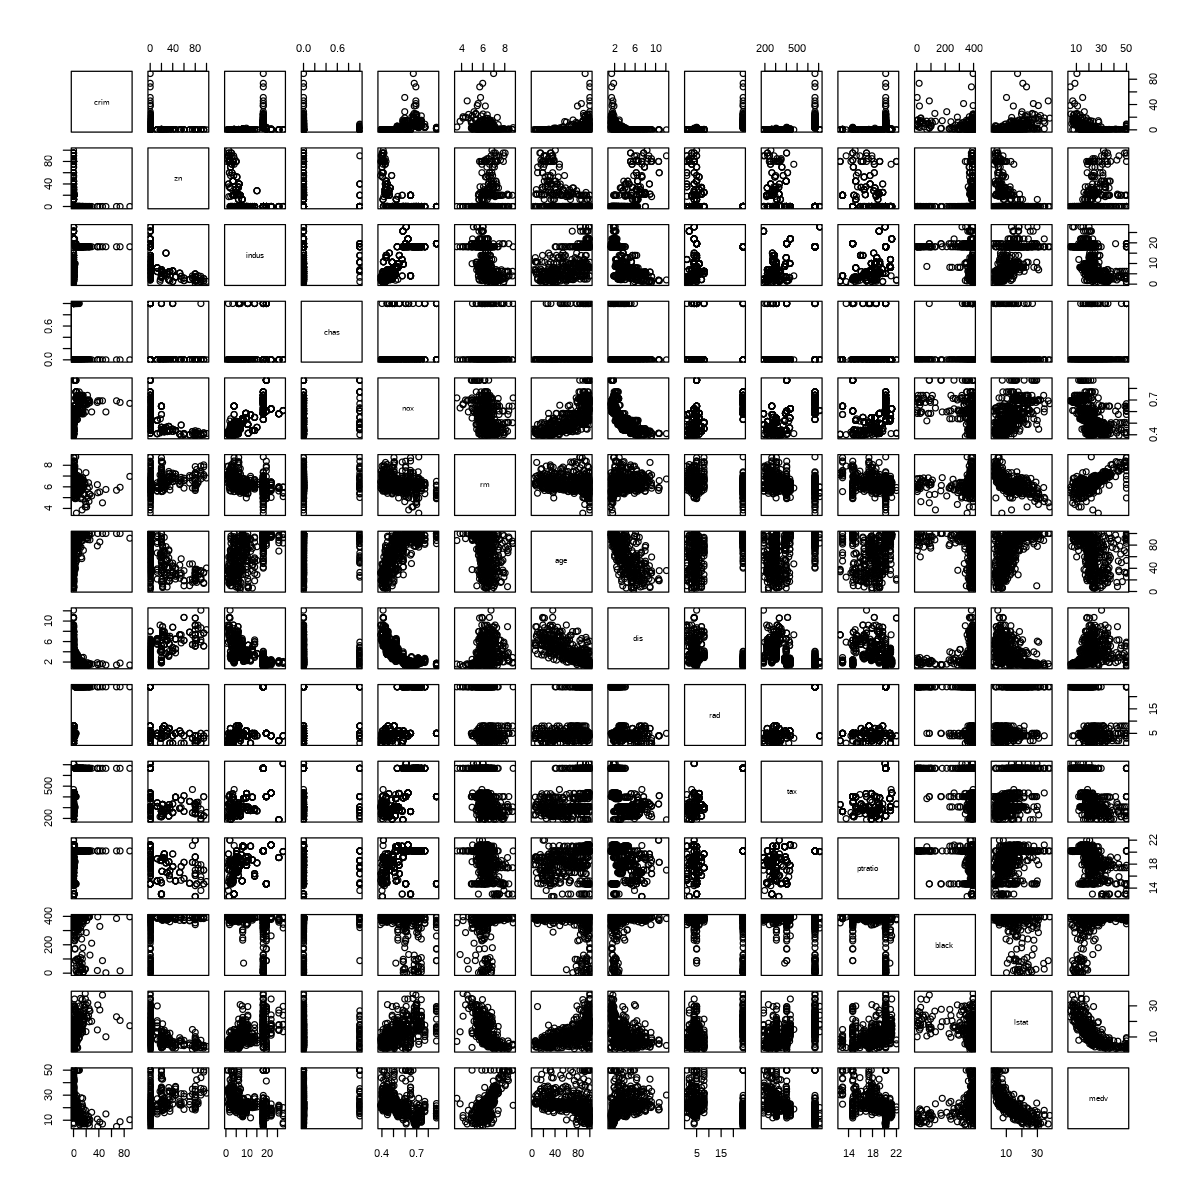


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

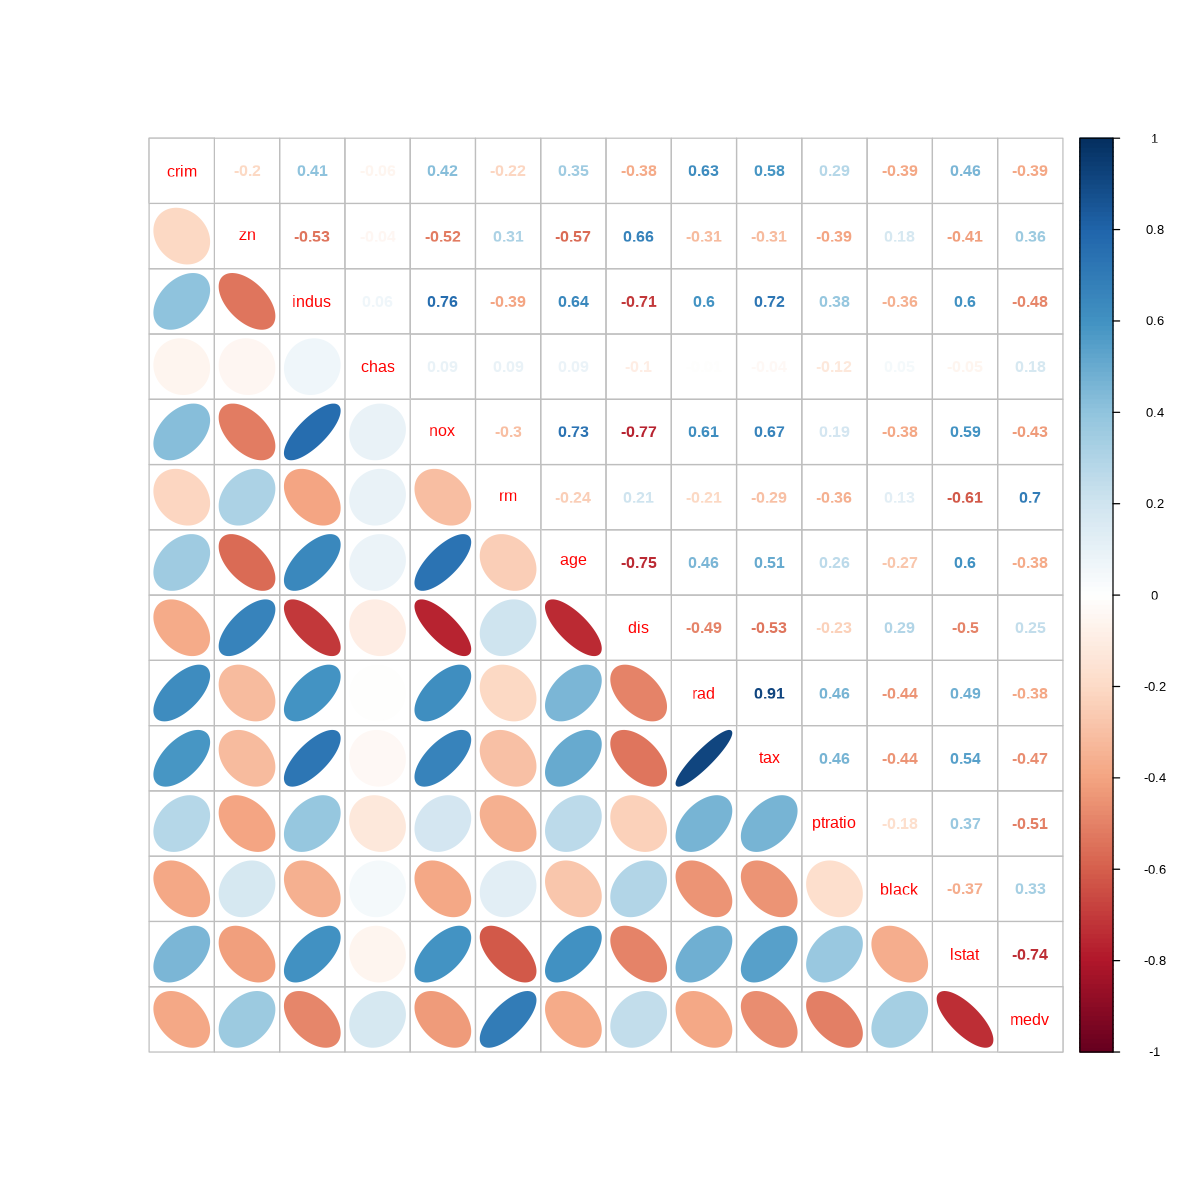

In [49]:
# 보스톤 집값 예측
# 보스톤 외곽지역 집값과 그것들과 관련있는 여러 요소들을 변수로 정의
# 최종적으로 집값에 영향을 주는 요인은 무엇일까?

library(MASS)
str(Boston)

plot(Boston)
cp <- cor(Boston)
corrplot.mixed(cp, upper='number', lower='ellipse')

md <- lm(medv~., data=Boston)
summary(md)

# 결정계수 : 0.73
# 회귀모형 유의성 : 0.05보다 작음
# 회귀계수 유의성 : indus, age 제외한 나머지 계수는 유의미함

In [50]:
# 다중공선성
vif(md)
# rad, tax의 팽창계수가 높음

crim       zn    indus     chas      nox       rm      age      dis 
1.792192 2.298758 3.991596 1.073995 4.393720 1.933744 3.100826 3.955945 
     rad      tax  ptratio    black    lstat 
7.484496 9.008554 1.799084 1.348521 2.941491

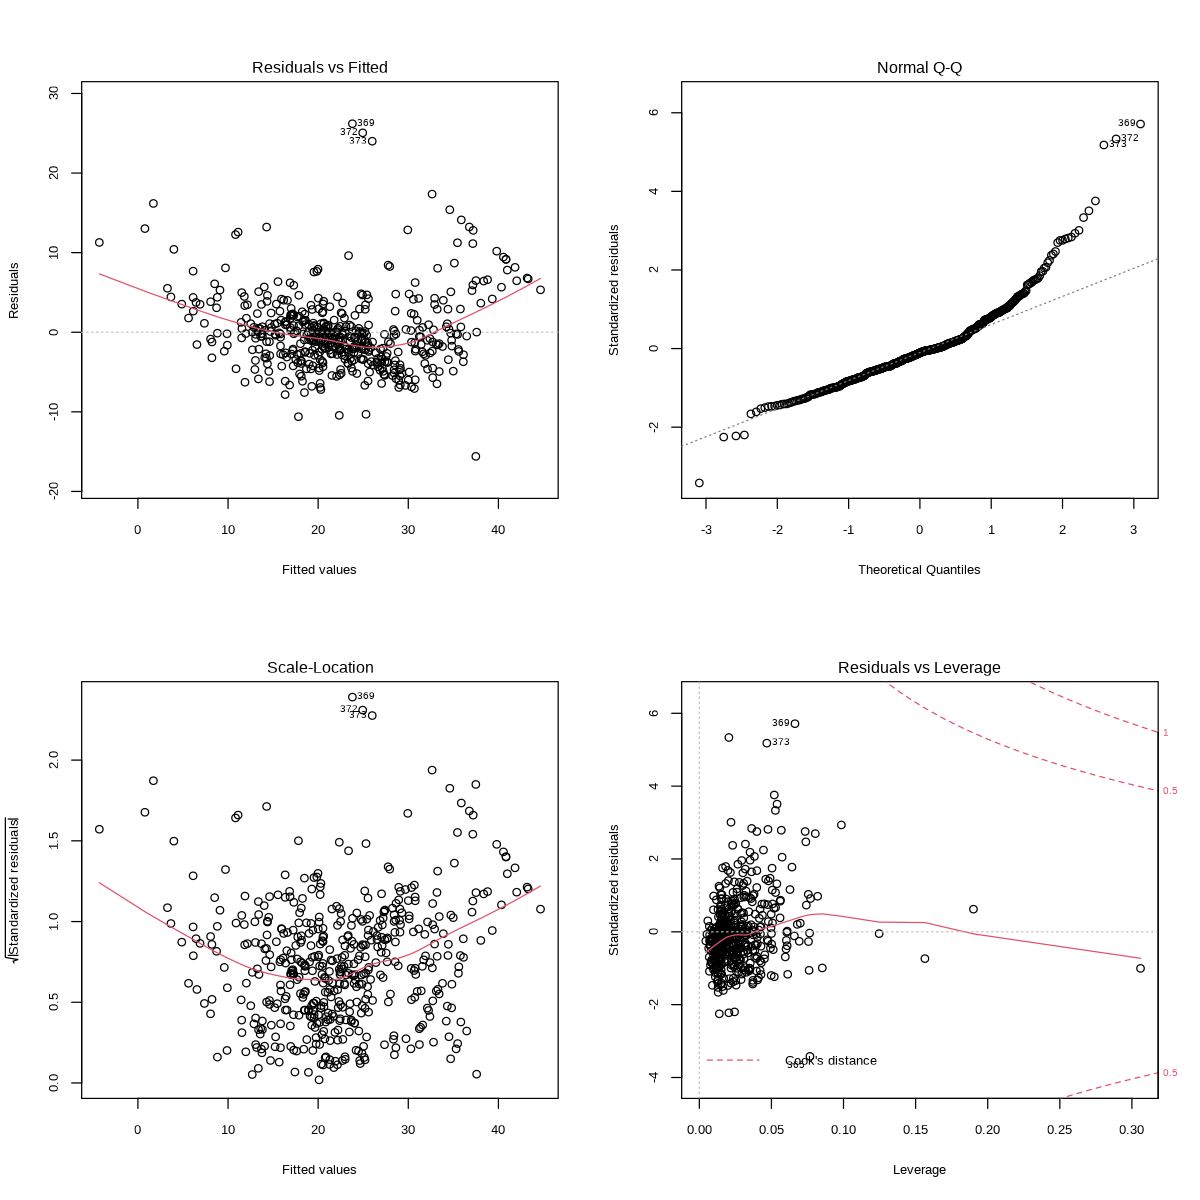

In [53]:
# 회귀모형 적합성 평가
par(mfrow=c(2,2))
plot(md)

산출된 회귀방정식은 주택가격의 변동성을 ~%정도로 설명하고 있고 회귀모형은 몇몇 이상치로 인해 레버리지 효과가 보이지만 적합성 평가시 다소 문제가 없어보임

In [60]:
#후진소거법을 이용해서 수동으로 변수소거 실시
bm <- lm(medv~., data=Boston)
summary(bm)  #0.7338
# 회귀계수들 중 유의확률이 낮은 변수 제거

bm <- lm(medv~.-indus-age, data=Boston)
summary(bm) #0.7348
#=> indus, age 제거함 


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0


Call:
lm(formula = medv ~ . - indus - age, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5984  -2.7386  -0.5046   1.7273  26.2373 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.341145   5.067492   7.171 2.73e-12 ***
crim         -0.108413   0.032779  -3.307 0.001010 ** 
zn            0.045845   0.013523   3.390 0.000754 ***
chas          2.718716   0.854240   3.183 0.001551 ** 
nox         -17.376023   3.535243  -4.915 1.21e-06 ***
rm            3.801579   0.406316   9.356  < 2e-16 ***
dis          -1.492711   0.185731  -8.037 6.84e-15 ***
rad           0.299608   0.063402   4.726 3.00e-06 ***
tax          -0.011778   0.003372  -3.493 0.000521 ***
ptratio      -0.946525   0.129066  -7.334 9.24e-13 ***
black         0.009291   0.002674   3.475 0.000557 ***
lstat        -0.522553   0.047424 -11.019  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.736 on 494 d

In [62]:
bm <- lm(medv~.-indus-age-crim-chas, data=Boston)
summary(bm) # 0.724
# crim, chas 제거함


Call:
lm(formula = medv ~ . - indus - age - crim - chas, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.8917  -2.7329  -0.4988   1.8547  26.6433 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  35.459724   5.158054   6.875 1.87e-11 ***
zn            0.041396   0.013737   3.013 0.002715 ** 
nox         -15.502932   3.583879  -4.326 1.84e-05 ***
rm            3.879580   0.414180   9.367  < 2e-16 ***
dis          -1.451648   0.187926  -7.725 6.26e-14 ***
rad           0.252412   0.061778   4.086 5.12e-05 ***
tax          -0.012360   0.003427  -3.606 0.000342 ***
ptratio      -0.968703   0.131248  -7.381 6.69e-13 ***
black         0.010842   0.002705   4.008 7.06e-05 ***
lstat        -0.555124   0.047699 -11.638  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.832 on 496 degrees of freedom
Multiple R-squared:  0.7289,	Adjusted R-squared:  0.724 
F-statistic: 148.2 on

In [64]:
bm <- lm(medv~.-indus-age-crim-chas-zn, data=Boston)
summary(bm) # 0.7195
# zn 제거함


Call:
lm(formula = medv ~ . - indus - age - crim - chas - zn, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.2124  -2.8908  -0.7128   1.8377  26.9930 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.184181   5.194165   6.966 1.04e-11 ***
nox         -16.727959   3.589578  -4.660 4.06e-06 ***
rm            4.060112   0.413142   9.827  < 2e-16 ***
dis          -1.170973   0.164541  -7.117 3.89e-12 ***
rad           0.243650   0.062209   3.917 0.000102 ***
tax          -0.010353   0.003389  -3.055 0.002373 ** 
ptratio      -1.106042   0.124077  -8.914  < 2e-16 ***
black         0.010811   0.002727   3.965 8.43e-05 ***
lstat        -0.552298   0.048076 -11.488  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.871 on 497 degrees of freedom
Multiple R-squared:  0.7239,	Adjusted R-squared:  0.7195 
F-statistic: 162.9 on 8 and 497 DF,  p-value: < 2.2e-16


In [65]:
bm <- lm(medv~.-indus-age-crim-chas-zn-tax, data=Boston)
summary(bm) # 0.7148
# tax 제거함


Call:
lm(formula = medv ~ . - indus - age - crim - chas - zn - tax, 
    data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5815  -3.0628  -0.5647   1.8793  26.8951 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  34.590152   5.210940   6.638 8.33e-11 ***
nox         -19.132370   3.531397  -5.418 9.41e-08 ***
rm            4.187924   0.414442  10.105  < 2e-16 ***
dis          -1.174139   0.165909  -7.077 5.03e-12 ***
rad           0.091038   0.037379   2.436   0.0152 *  
ptratio      -1.144129   0.124477  -9.191  < 2e-16 ***
black         0.011203   0.002746   4.079 5.26e-05 ***
lstat        -0.557822   0.048443 -11.515  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.912 on 498 degrees of freedom
Multiple R-squared:  0.7187,	Adjusted R-squared:  0.7148 
F-statistic: 181.8 on 7 and 498 DF,  p-value: < 2.2e-16


In [66]:
bm <- lm(medv~.-indus-age-crim-chas-zn-tax-rad, data=Boston)
summary(bm) # 0.712
# rad 제거함


Call:
lm(formula = medv ~ . - indus - age - crim - chas - zn - tax - 
    rad, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.3352  -2.9006  -0.7175   1.7552  28.0066 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  30.516970   4.959607   6.153 1.56e-09 ***
nox         -15.842368   3.278907  -4.832 1.81e-06 ***
rm            4.354807   0.410753  10.602  < 2e-16 ***
dis          -1.159603   0.166619  -6.960 1.08e-11 ***
ptratio      -1.012059   0.112597  -8.988  < 2e-16 ***
black         0.009578   0.002677   3.578 0.000381 ***
lstat        -0.545497   0.048415 -11.267  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.936 on 499 degrees of freedom
Multiple R-squared:  0.7154,	Adjusted R-squared:  0.712 
F-statistic:   209 on 6 and 499 DF,  p-value: < 2.2e-16


In [ ]:
# 최종회귀모형
# => nox+rm+dis+ptratio+black+lstat
# => 결정계수 : 0.712

In [45]:
step(lm(medv~., data=Boston), direction='backward')

Start:  AIC=1589.64
medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + 
    tax + ptratio + black + lstat

          Df Sum of Sq   RSS    AIC
- age      1      0.06 11079 1587.7
- indus    1      2.52 11081 1587.8
<none>                 11079 1589.6
- chas     1    218.97 11298 1597.5
- tax      1    242.26 11321 1598.6
- crim     1    243.22 11322 1598.6
- zn       1    257.49 11336 1599.3
- black    1    270.63 11349 1599.8
- rad      1    479.15 11558 1609.1
- nox      1    487.16 11566 1609.4
- ptratio  1   1194.23 12273 1639.4
- dis      1   1232.41 12311 1641.0
- rm       1   1871.32 12950 1666.6
- lstat    1   2410.84 13490 1687.3

Step:  AIC=1587.65
medv ~ crim + zn + indus + chas + nox + rm + dis + rad + tax + 
    ptratio + black + lstat

          Df Sum of Sq   RSS    AIC
- indus    1      2.52 11081 1585.8
<none>                 11079 1587.7
- chas     1    219.91 11299 1595.6
- tax      1    242.24 11321 1596.6
- crim     1    243.20 11322 1596.6
- zn       1


Call:
lm(formula = medv ~ crim + zn + chas + nox + rm + dis + rad + 
    tax + ptratio + black + lstat, data = Boston)

Coefficients:
(Intercept)         crim           zn         chas          nox           rm  
  36.341145    -0.108413     0.045845     2.718716   -17.376023     3.801579  
        dis          rad          tax      ptratio        black        lstat  
  -1.492711     0.299608    -0.011778    -0.946525     0.009291    -0.522553  


In [27]:
step(lm(medv~1, data=Boston), scope=list(lower=~1, upper=~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat), direction='forward')

Start:  AIC=2246.51
medv ~ 1

          Df Sum of Sq   RSS    AIC
+ lstat    1   23243.9 19472 1851.0
+ rm       1   20654.4 22062 1914.2
+ ptratio  1   11014.3 31702 2097.6
+ indus    1    9995.2 32721 2113.6
+ tax      1    9377.3 33339 2123.1
+ nox      1    7800.1 34916 2146.5
+ crim     1    6440.8 36276 2165.8
+ rad      1    6221.1 36495 2168.9
+ age      1    6069.8 36647 2171.0
+ zn       1    5549.7 37167 2178.1
+ black    1    4749.9 37966 2188.9
+ dis      1    2668.2 40048 2215.9
+ chas     1    1312.1 41404 2232.7
<none>                 42716 2246.5

Step:  AIC=1851.01
medv ~ lstat

          Df Sum of Sq   RSS    AIC
+ rm       1    4033.1 15439 1735.6
+ ptratio  1    2670.1 16802 1778.4
+ chas     1     786.3 18686 1832.2
+ dis      1     772.4 18700 1832.5
+ age      1     304.3 19168 1845.0
+ tax      1     274.4 19198 1845.8
+ black    1     198.3 19274 1847.8
+ zn       1     160.3 19312 1848.8
+ crim     1     146.9 19325 1849.2
+ indus    1      98.7 19374 1850.4



Call:
lm(formula = medv ~ lstat + rm + ptratio + dis + nox + chas + 
    black + zn + crim + rad + tax, data = Boston)

Coefficients:
(Intercept)        lstat           rm      ptratio          dis          nox  
  36.341145    -0.522553     3.801579    -0.946525    -1.492711   -17.376023  
       chas        black           zn         crim          rad          tax  
   2.718716     0.009291     0.045845    -0.108413     0.299608    -0.011778  


In [29]:
step(lm(medv~1, data=Boston), scope=list(upper=~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat), direction='both')

Start:  AIC=2246.51
medv ~ 1

          Df Sum of Sq   RSS    AIC
+ lstat    1   23243.9 19472 1851.0
+ rm       1   20654.4 22062 1914.2
+ ptratio  1   11014.3 31702 2097.6
+ indus    1    9995.2 32721 2113.6
+ tax      1    9377.3 33339 2123.1
+ nox      1    7800.1 34916 2146.5
+ crim     1    6440.8 36276 2165.8
+ rad      1    6221.1 36495 2168.9
+ age      1    6069.8 36647 2171.0
+ zn       1    5549.7 37167 2178.1
+ black    1    4749.9 37966 2188.9
+ dis      1    2668.2 40048 2215.9
+ chas     1    1312.1 41404 2232.7
<none>                 42716 2246.5

Step:  AIC=1851.01
medv ~ lstat

          Df Sum of Sq   RSS    AIC
+ rm       1    4033.1 15439 1735.6
+ ptratio  1    2670.1 16802 1778.4
+ chas     1     786.3 18686 1832.2
+ dis      1     772.4 18700 1832.5
+ age      1     304.3 19168 1845.0
+ tax      1     274.4 19198 1845.8
+ black    1     198.3 19274 1847.8
+ zn       1     160.3 19312 1848.8
+ crim     1     146.9 19325 1849.2
+ indus    1      98.7 19374 1850.4



Call:
lm(formula = medv ~ lstat + rm + ptratio + dis + nox + chas + 
    black + zn + crim + rad + tax, data = Boston)

Coefficients:
(Intercept)        lstat           rm      ptratio          dis          nox  
  36.341145    -0.522553     3.801579    -0.946525    -1.492711   -17.376023  
       chas        black           zn         crim          rad          tax  
   2.718716     0.009291     0.045845    -0.108413     0.299608    -0.011778  


In [38]:
lm1 <- lm( medv ~ crim + zn + chas + nox + rm + dis + rad + tax + ptratio + black + lstat, data = Boston)
lm3 <- lm( medv ~ lstat + rm + ptratio + dis + nox + chas + black + zn + crim + rad + tax, data=Boston) 


Call:
lm(formula = medv ~ crim + zn + chas + nox + rm + dis + rad + 
    tax + ptratio + black + lstat, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5984  -2.7386  -0.5046   1.7273  26.2373 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.341145   5.067492   7.171 2.73e-12 ***
crim         -0.108413   0.032779  -3.307 0.001010 ** 
zn            0.045845   0.013523   3.390 0.000754 ***
chas          2.718716   0.854240   3.183 0.001551 ** 
nox         -17.376023   3.535243  -4.915 1.21e-06 ***
rm            3.801579   0.406316   9.356  < 2e-16 ***
dis          -1.492711   0.185731  -8.037 6.84e-15 ***
rad           0.299608   0.063402   4.726 3.00e-06 ***
tax          -0.011778   0.003372  -3.493 0.000521 ***
ptratio      -0.946525   0.129066  -7.334 9.24e-13 ***
black         0.009291   0.002674   3.475 0.000557 ***
lstat        -0.522553   0.047424 -11.019  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*

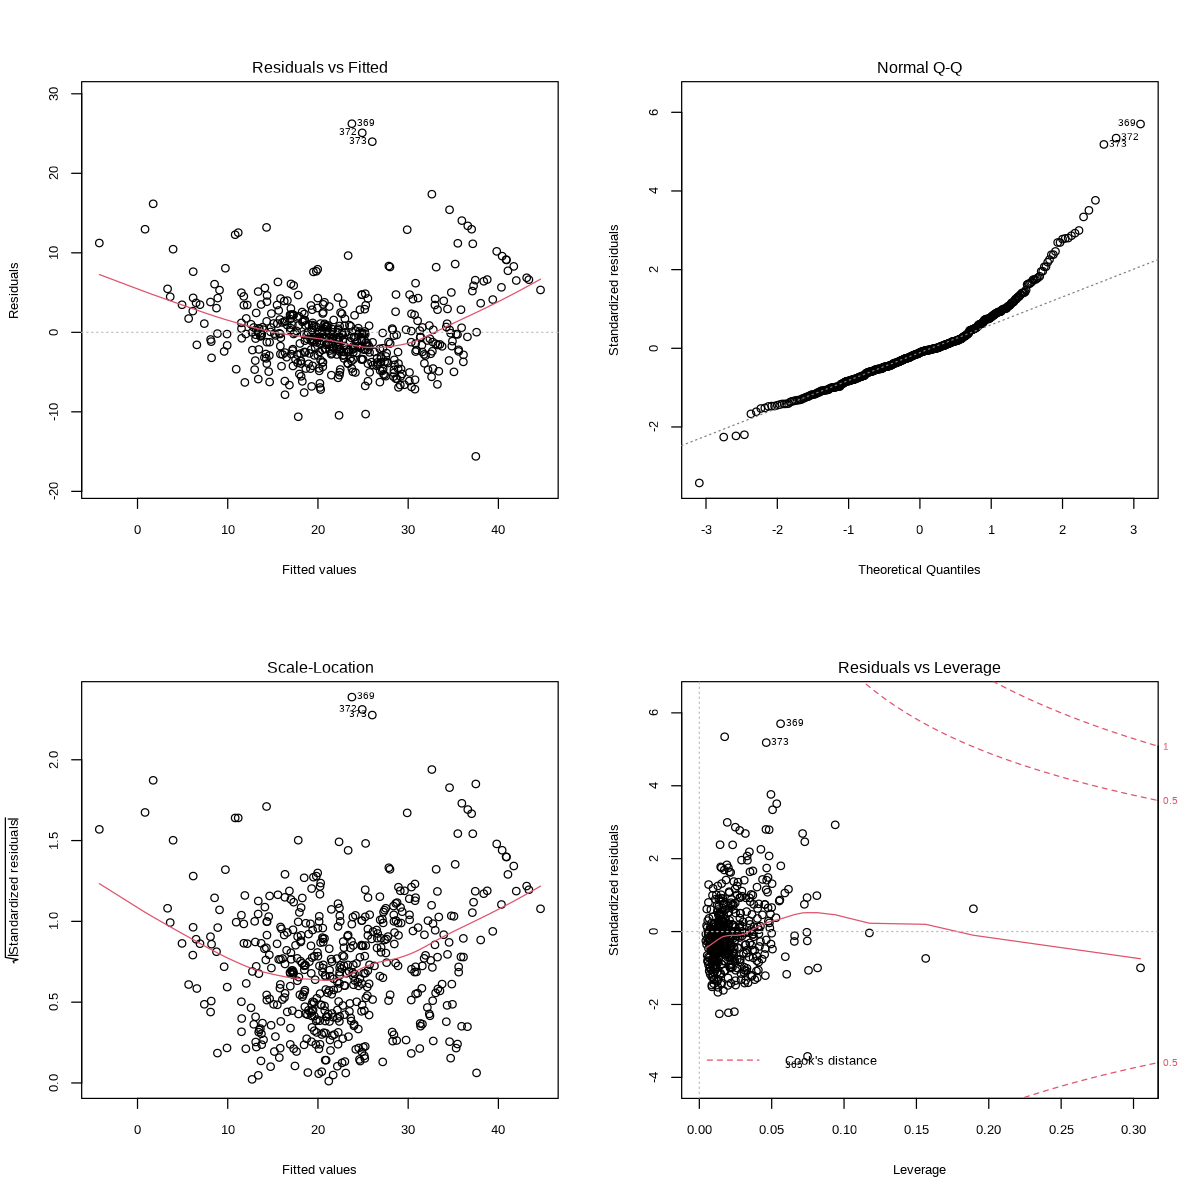

In [41]:
summary(lm1)
par(mfrow=c(2,2))
plot(lm1)


Call:
lm(formula = medv ~ lstat + rm + ptratio + dis + nox + chas + 
    black + zn + crim + rad + tax, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5984  -2.7386  -0.5046   1.7273  26.2373 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.341145   5.067492   7.171 2.73e-12 ***
lstat        -0.522553   0.047424 -11.019  < 2e-16 ***
rm            3.801579   0.406316   9.356  < 2e-16 ***
ptratio      -0.946525   0.129066  -7.334 9.24e-13 ***
dis          -1.492711   0.185731  -8.037 6.84e-15 ***
nox         -17.376023   3.535243  -4.915 1.21e-06 ***
chas          2.718716   0.854240   3.183 0.001551 ** 
black         0.009291   0.002674   3.475 0.000557 ***
zn            0.045845   0.013523   3.390 0.000754 ***
crim         -0.108413   0.032779  -3.307 0.001010 ** 
rad           0.299608   0.063402   4.726 3.00e-06 ***
tax          -0.011778   0.003372  -3.493 0.000521 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*

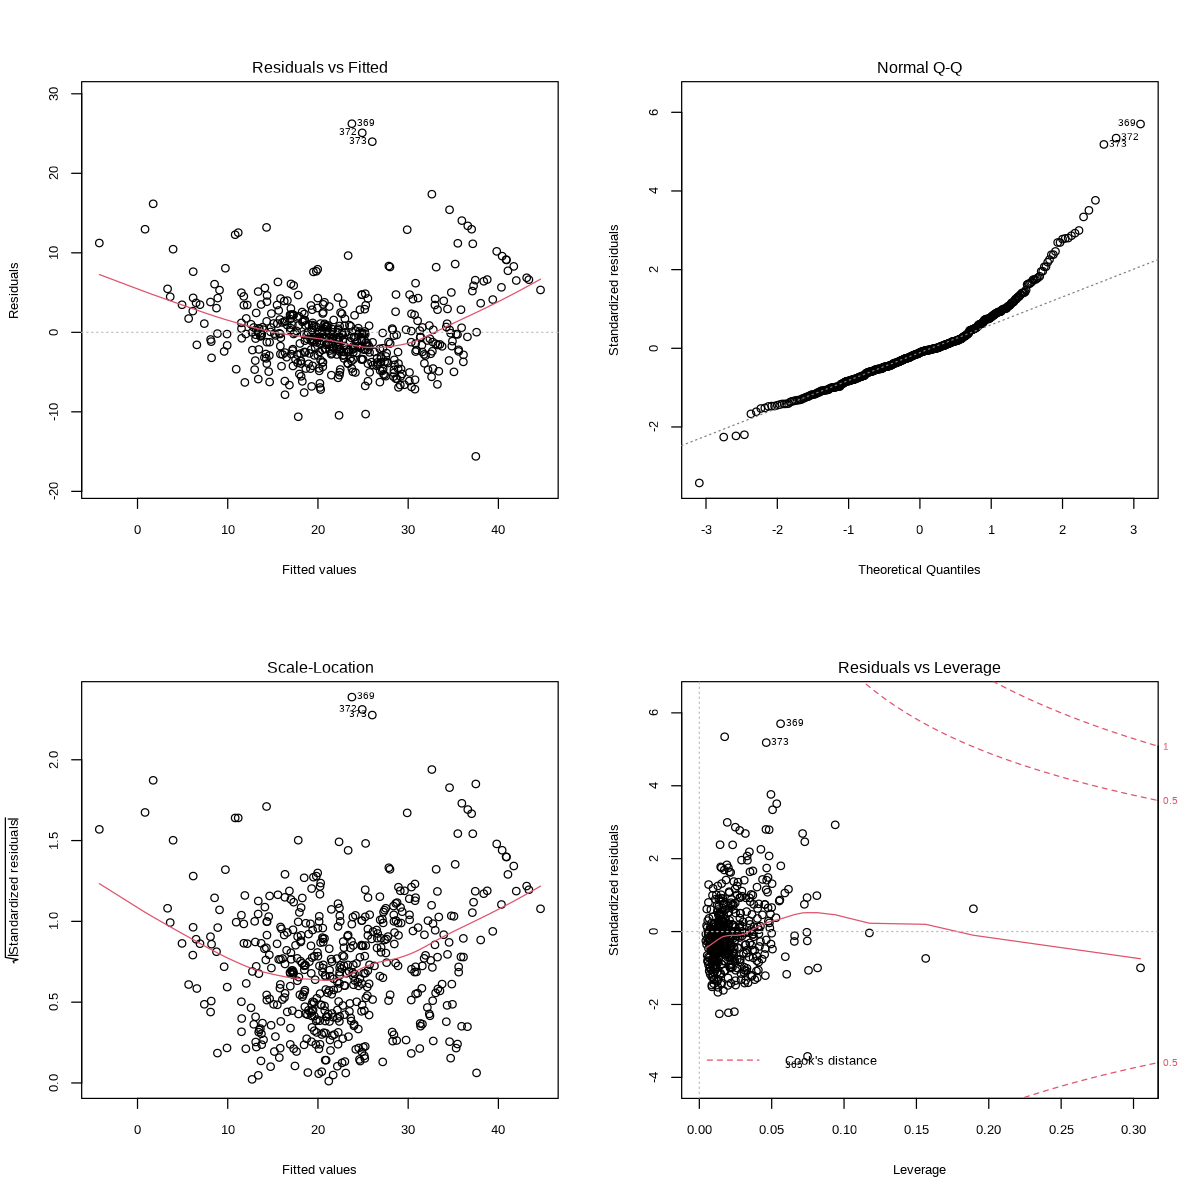

In [67]:
summary(lm3)
par(mfrow=c(2,2))
plot(lm3)

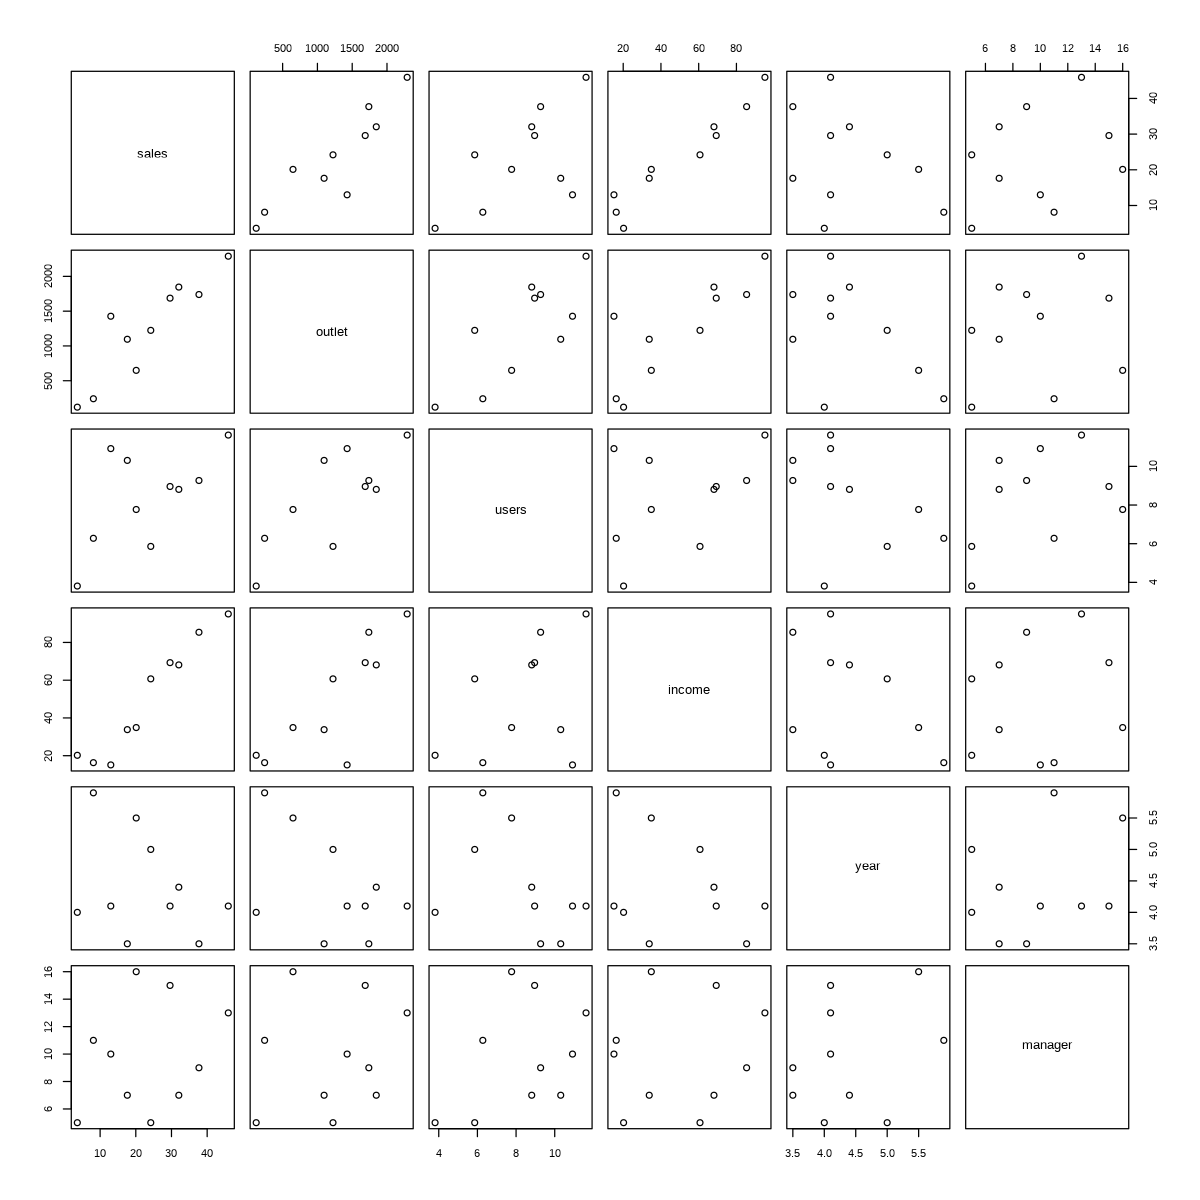

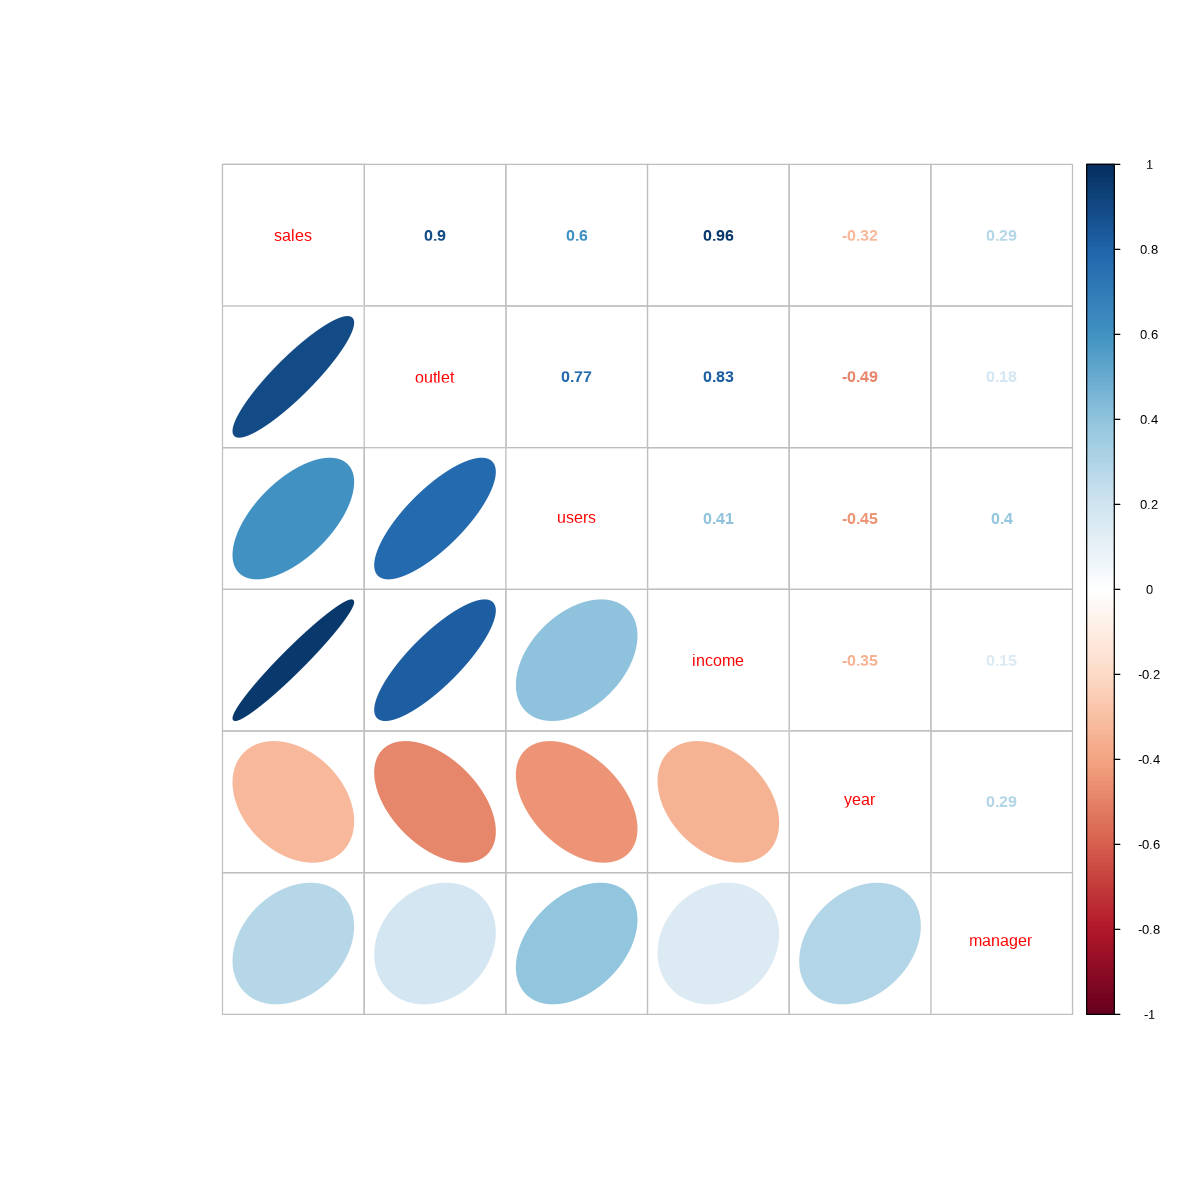

In [109]:
# 자동차 부품도매상 관리자는 각 지역의 연매출액을 추정하려 함. 지역 내 아울렛수, 차량등록수, 개인 총소득, 자동차 사용년수, 매니저수 등이 총매출에 어떤 영향을 주는지 회귀분석을 실시하시오.(carparts.txt)

cp <- read.csv('https://raw.githubusercontent.com/mermerm/r_statistics/master/datasets/carparts.txt', sep='\t')
cp$outlet <- gsub(',', '', cp$outlet)
cp$outlet <- as.integer(cp$outlet)

plot(cp)

cor <- cor(cp)
corrplot.mixed(cor, upper='number', lower='ellipse')



Call:
lm(formula = sales ~ ., data = cp)

Residuals:
       1        2        3        4        5        6        7        8 
 0.51354 -0.44897  0.92578  0.47742 -0.69353 -0.07153 -1.49467 -1.30426 
       9       10 
 1.72412  0.37211 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.968e+01  5.423e+00  -3.629 0.022189 *  
outlet      -6.321e-04  2.636e-03  -0.240 0.822241    
users        1.741e+00  5.526e-01   3.150 0.034519 *  
income       4.100e-01  4.385e-02   9.351 0.000728 ***
year         2.036e+00  8.780e-01   2.319 0.081211 .  
manager     -3.466e-02  1.881e-01  -0.184 0.862813    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.507 on 4 degrees of freedom
Multiple R-squared:  0.9943,	Adjusted R-squared:  0.9873 
F-statistic: 140.4 on 5 and 4 DF,  p-value: 0.0001397


outlet     users    income      year   manager 
13.998061  7.261683  6.633062  1.992682  2.175985

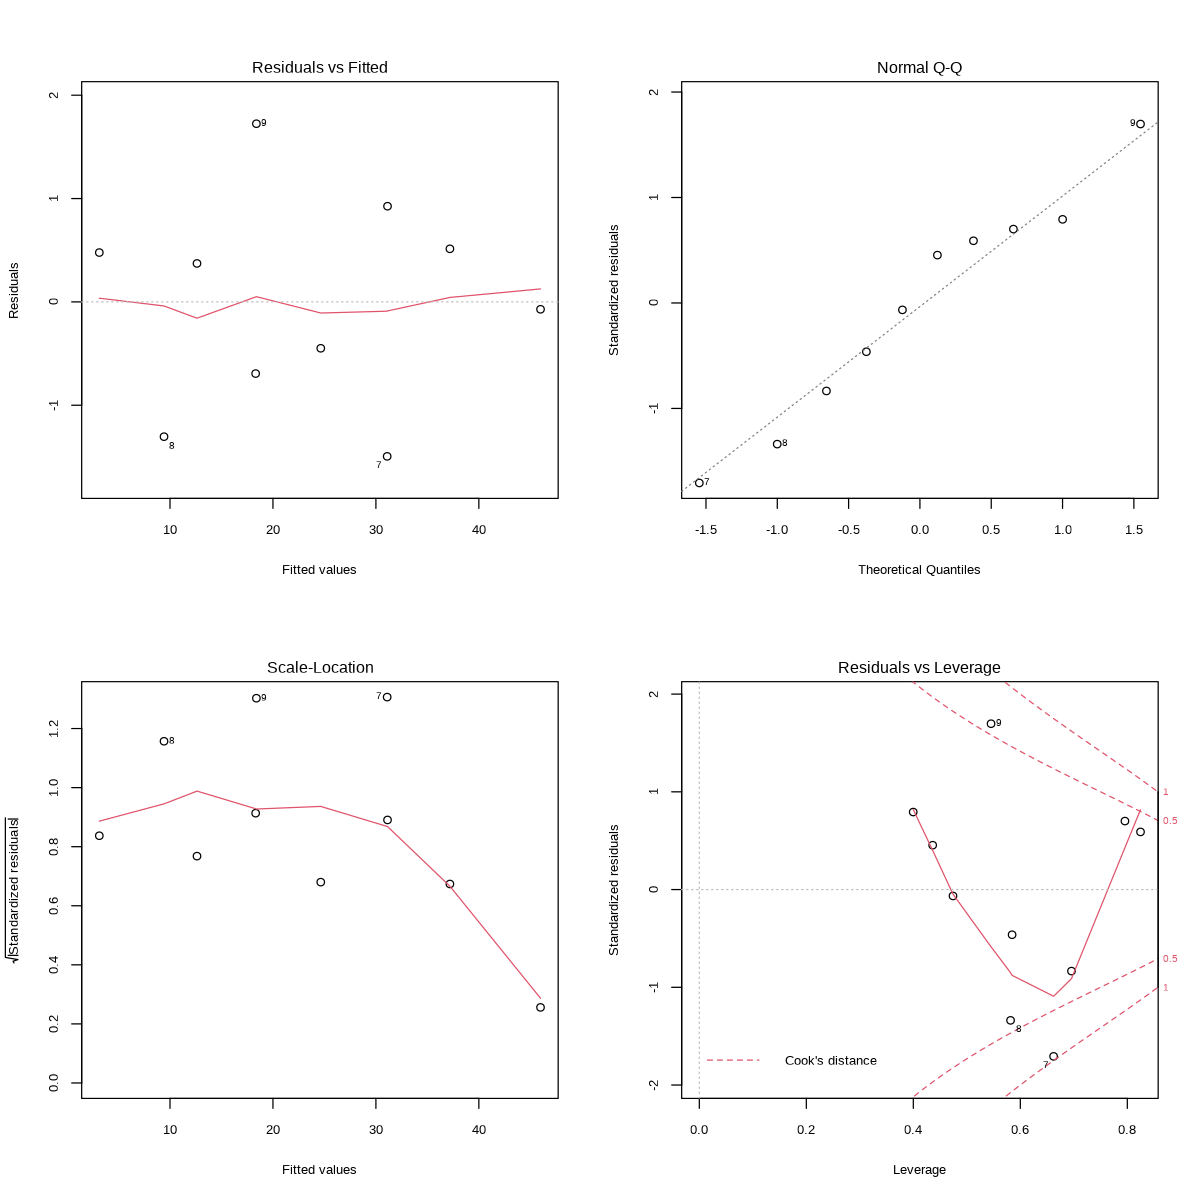

In [121]:
lmcp <- lm(sales~., data=cp)
par(mfrow=c(2,2))
plot(lmcp)

summary(lmcp)
vif(lmcp)

In [125]:
step(lm(sales~., data=cp), direction='backward')

Start:  AIC=11.04
sales ~ outlet + users + income + year + manager

          Df Sum of Sq     RSS    AIC
- manager  1     0.077   9.160  9.122
- outlet   1     0.131   9.213  9.181
<none>                   9.083 11.038
- year     1    12.213  21.295 17.559
- users    1    22.528  31.611 21.509
- income   1   198.528 207.611 40.331

Step:  AIC=9.12
sales ~ outlet + users + income + year

         Df Sum of Sq     RSS    AIC
- outlet  1     0.072   9.232  7.201
<none>                  9.160  9.122
- year    1    16.587  25.746 17.457
- users   1    35.213  44.373 22.900
- income  1   240.834 249.994 40.189

Step:  AIC=7.2
sales ~ users + income + year

         Df Sum of Sq     RSS    AIC
<none>                   9.23  7.201
- year    1     17.36   26.59 15.781
- users   1    102.26  111.49 30.113
- income  1   1001.88 1011.11 52.162



Call:
lm(formula = sales ~ users + income + year, data = cp)

Coefficients:
(Intercept)        users       income         year  
   -18.9239       1.6129       0.4003       1.9637  


In [119]:
lmcp2 <- lm(sales~income+users, data=cp)
summary(lmcp2)


Call:
lm(formula = sales ~ income + users, data = cp)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9842 -1.4566  0.0324  0.8099  3.5757 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.75338    2.31131  -3.355  0.01217 *  
income       0.38954    0.02413  16.143 8.51e-07 ***
users        1.37693    0.29063   4.738  0.00211 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.949 on 7 degrees of freedom
Multiple R-squared:  0.9834,	Adjusted R-squared:  0.9787 
F-statistic: 207.5 on 2 and 7 DF,  p-value: 5.882e-07
